# Tutorial of `H2MM_C` API for use with FRETBursts

<p class="lead">This <a href="https://jupyter.org/">Jupyter notebook</a>
To run a cell, press <b>'shift+enter'</b> while the cell is selected. Before running, make sure you have installed <a href="https://numpy.org/">NUMPY</a>, <a href="https://matplotlib.org">Matplotlib</a>, <a href="https://fretbursts.readthedocs.io/en/latest/">FRETbursts</a> and <a href="https://github.com/harripd/H2MMpythonlib/">H2MM_C</a>.</p>

NUMPY is one of the most commonly used python modules in scientific computing, so it might be included already in your install, but if it is not, you can follow the installation guide here: <a href="https://numpy.org/install/">https://numpy.org/install/</a>

Matplotlib is a very common python module for creating professional looking plots and graphs, and the default in many scientific applications, it may also be included by default in your python installation. If it is not, see the install guide here: <a href="https://matplotlib.org/stable/users/installing.html">https://matplotlib.org/stable/users/installing.html</a>


If you are new to Python, and want some tutorials, may I recommend the tutorials on <a href="https://www.youtube.com/user/schafer5">Corey Schafer's YouTube channel</a>. Some of the particular videos I'd recommend are the following: <a href="https://www.youtube.com/watch?v=W8KRzm-HUcc">lists tuple and sets</a>, <a href="https://www.youtube.com/watch?v=DZwmZ8Usvnk">conditionals</a>, <a href="https://www.youtube.com/watch?v=6iF8Xb7Z3wQ">loops and iterations</a>, <a href="https://www.youtube.com/watch?v=9Os0o3wzS_I">functions</a>.

Cells can be 'Code' 'Markdown' 'Raw NBConvert' or 'Heading'
- Code cells are the "meat" of the jupyter notebook, they are where you put python code you actually want to run
- Markdown cells are for communicating with the reader, they use the github flavor of Markdown, so when they are rendered, (either when you open the notebook, or after editing you can hit shift+enter) the text is readable, and has various formatting niceties like bold, italics, headings, bullet points etc.
- Raw NBConvert cells are rare, not used in this tutorial, but contain data that is neither rendered or executed except when exporting to PDF or the like
- Heading, a soon to be deprecated feature, which gives you a heading in the Markdown format (ie a heading in a markdown cell is equivalent to a heading cell)



# Outline
0. [Importing Modules](#0)
1. [Basic Analysis](#1)
 - [1.1 Basic Analysis](#11)
     - [1.1.1 Load Data](#111)
     - [1.1.2 Define some initial "guess" models](#112)
     - [1.1.3 Optimize Model](#113)
 - [1.2 Viterbi](#12)
 - [1.3 Likelihood Estimators](#13)
 - [1.4 Analysis Workflow](#14)
 - [1.5 `H2MM_arr` Function](#15)
 - [1.6 Bootstrap Error Calculation](#16)
2. [The `h2mm_model` object](#2)
 - [2.1 Accessing core `h2mm_model` parameters](#21)
 - [2.2 Review of `h2mm_model` Fields](#22)
 - [2.3 Changing Values in a Model](#23)
 - [2.4 `h2mm_model` Methods](#24)
     - [2.4.1 The `.copy()` method](#241)
     - [2.4.2 The `.evaluate` Method](#242)
     - [2.4.3 The `.optimize` Method](#243)
     - [2.4.4 `EM_H2MM_C` vs `.optimize` and `H2MM_arr` vs `.evaluate`: They're basically the same](#244)
3. [Format of Color and Time (Data)](#3)
4. [Simulating Data](#4)
 - [4.1 Random Path Functions](#41)
     - [4.1.1 Generating a Random State Path](#411)
     - [4.1.2 Generating a Random Photon Path](#412)
     - [4.1.3 Generating States and Streams Together](#413)
 - [4.2 Setting the Random Seed](#42)
 - [4.3 Recreating Data](#43)
5. [Multiparameter H2MM](#5)
 - [5.1 Working with more than 2 streams](#51)
 - [5.2 Setting up the **emission probability matrix**](#52)
 - [5.3 Checking a Model: `.ndet` and `.nstate` fields in `h2mm_model` objects](#53)
6. [Converting model values into Human units](#6)
 - [6.1 Transition probability matrix](#61)
 - [6.2 $E$ and $S$ from the emmission probability matrix](#62)
 - [6.3 Automated functions for calculations](#63)
7. [Controlling `EM_H2MM_C`](#7)
 - [7.1 Convergence](#71)
     - [7.1.1 Using `.optimize` instead](#711)
 - [7.2 Limits](#72)
     - [7.2.1 Our First Bounded Fit](#721)
     - [7.2.2 The `h2mm_limits` object](#722)
     - [7.2.3 `bounds_func` Options](#723)
 - [7.3 Auto-generate Initial Model with `factory_h2mm_model` function](#73)
     - [7.3.1 Use `factory_h2mm_model` to make initial model](#731)
     - [7.3.2 Bounds and `factory_h2mm_model`](#732)
     - [7.3.3 Distribution kwargs in `factory_h2mm_model`](#733)
     - [7.3.4 Full analysis with bounds and `factory_h2mm_model`](#734)
 - [7.4 "Continuous" Analysis](#74)
 - [7.5 While loop analysis](#75)
8. [Customizing `EM_H2MM_C`](#8)
 - [8.1 Changing parallelization: the `num_cores` kwarg](#81)
 - [8.2 Printing `EM_H2MM_C` iterations](#82)
     - [8.2.1 Basic `print_func` options](#821)
     - [8.2.2 Customized display using your own function](#822)
 - [8.3 User Defined Limits Function](#83)
9. [Apendices](#9)
 - [9.1 `h2mm_model` fields](#91)
     - [9.1.1 Statistical Fields](#911)
     - [9.1.2 `.niter`](#912)
     - [9.1.3 Convergence Info](#913)
 -[9.2 `EM_H2MM_C` and `.optimize` Arguments and Fields](#92)
     - [9.2.1 The `reset_niter` argument](#921)

### Text color explanation
Cells that are examples of "complete" analysis are preceded by headings in <font color="blue">blue</font>. The fast-learning/experience Python programmer might be able to piece everything togoether with just these cells. These cells will also be useful as "skeletons" for building analysis of other data. (Please use as a skeleton, not just copy paste)

### List of <font color="blue">"skeleton code"</font> cells
- [Optimizing a model](#optimization)
- [Basic Workflow](#wholeanalysis1)
- [Error Evaluation](#erroreval) Note: this does not include the prior optimization steps
- [Analysis using auto-generated models](#fhmwrkflow) Note: this and the next blue cell are very similar
- [Analysis with bounds and autogenerated models](#634)
- [Continuous Analysis Worklfow](#optwrkflow)
- [While loop based Workflow](#finaldemo)

Other colors indicate other things
- <font color="gray">Gray</font> indicates a review of information mostly already presented- good to review, but skippable if you've been paying attention.
- <font color="green">Green</font> indicates that the next cell is introducing a property, and is in some way new. 
- <font color="brown">Brown</font> indicates advice and/or warnings for researchers, especially those who are coming from Matlab.
- <font color="teal">Teal</font> indicates this text is an explanation for experienced Python programmers, talking about some deep level behavior of the `H2MM_C` API
- <font color="magenta">Magenta</font> (of which there is only one) is a deeper explanation of the **C** level inner workings of the `H2MM_C` API

This tutorial is long, bellow are the most impoartant chapters/sections. You might be able to skip the others.

[Chapter 1](#1) is the most essential, and should be enough to get you off the ground- don't skip it!

[Chapter 5](#5) is **very** helpful in understanding multi-parameter fitting, and how the data is changed, but does not introduce anything that couldn't be reasoned out from chapter 1.

The remaining chapters are for "advanced" fitting. So they can wait for later, but you should look into them if you want to be able to use the `H2MM_C` API to its full potential.

[Section 8.2](#82) and [section 8.3](#83) detail how to write custom printing, and very powerful, but also very dangerous, limits functions respectively.

<a id='0'></a>
# 0. Importing Modules

First, we need to import some modules, we're going to need:
- `numpy` for some array inputs, we use `import numpy as np` so that whenever we use numpy we can call it with the prefix `np.`. This is standard practice in scientific computing.
- `matplotlib` for plotting graphs so we can visualize our results, we use `from matplotlib import pyplot as plt` because it turns out that we'll only need the `pyplot` subset of `matplotlib`, and `plt` is much less wordy than typing `matplotlib.pyplot` over and over. Like how we imported `numpy`, this is standard practice in scientific computing.
- `fretbursts` the API we will be useing to pre-process our raw data into bursts. We use `from fretbursts import *` so we all functions/classes are available without specifiend an additional `fretbursts.` identifier.
- `H2MM_C` the API for H<sup>2</sup>MM, we use `from H2MM_C import *` so all functions/classes are available without specifying an additional `H2MM_C.` identifier.

We're also importing
- `os` so we can load our sample datafile, its name is already so short, we just call it as `import os`
    - Often in real analysis you will still need many of the functions in `os`, so you'll probably import `os` anyways, even if you are using FRETBursts

In [1]:
#import the needed modules
import os
import numpy as np
from matplotlib import pyplot as plt

from fretbursts import *
from H2MM_C import *

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.7+32.g315c60d).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------


<a id='1'></a>
# 1. Basic Analysis

mpH<sup>2</sup>MM is fundamentally an optimization method. It's main goal is to find the "optimal" **model** that describes a set of **data**. The **model** assumes the system is transitioning between a finite number of **states**. It is further assumed that the **states** are "hidden" and that the data instead comes in the form of a set of data points, which we will call **photons** because that is what they are when we are working with single molecule confocal data, the system for which H<sup>2</sup>MM was designed. Each **photon** has a **time** and **detector** (or **stream**) associated with it. Each **state** has a certain probability of producing a photon, in each **stream**. Usually you will have many short sequences that all represent the same system, which we will refer to as **bursts**, again, because these usually represent bursts of photons caused by single molecules diffusing in and out of the confocal volume.

Each **model** is composed of a set of arrays:
1. The **initial probability matrix**, this is the least important array, which describes the probaility of the data beginning in each state.
2. The **transition probability matrix**, the likelihood of one state transitioning to another
3. The **emission probability matrix**, the likelihood of a state producing a data point in a given stream

"Optimization" is specifically the optimization of the loglikelihood, basically, it is the likelihood that the model describes the data, so optimization is a process to find the model that has the highest, i.e. the best chance of describing the data.

<a id='11'></a>
## 1.1 Run Analysis
So, the basic process is:
1. Load and/or process data
2. Define an initial **model**
3. Optimize **model** against **data**

Since H<sup>2</sup>MM is usually used for confocal burst data, the **streams** are the detectors, and data is usually composed of a set of bursts of photons. So the first step is usually taking your burst selection, and converting it into a form that `H2MM_C` can accept.

<a id='111'></a>
### 1.1.1 Load Data
#### First, we need some data, let's load it from the provided file:

- We must first load the data, in this tutorial, we will use data that has been distributed in the open photon-HDF5 format.
    - This data has note been separated into bursts, so we must first process the data to find the bursts.
- This tutorial will use the python package <a href="https://fretbursts.readthedocs.io/en/latest/">FRETBursts</a>
    - This is not intended as a tutorial of FRETBursts. As such only the minimal commands are given to properly find and select the bursts. These have been verified to be valid for the data supplied, **BUT** if you are using your own data, you should also plot various photon statistics and modify the values accordingly to verify that your data has both sufficiently low background levels, and your burst selection is valid for your data set.

#### The **data** is imported into two lists: `color` and `times`
- `color` is a list* (it can also be a tuple) of NUMPY arrays, each array is a **burst** which contains the **stream** indices (0,1,2...) of the photons *(Note that this is not exclusively based on the **detector** as two streams may also be distinguished by the excitation period, so one **detector** might give rise to two **streams**: one for donor excitaiton, and one for acceptor excitation)*
- `times` is a list* (it can also be a tuple) of NUMPY arrays, much like in `color` each burst gets an array, but instead of containing the **stream** indeces, these are the photon arrival times (arbitrary units). <font color="brown">Make sure that the elements of `color` and `times` match, i.e. they're the same length, we'll be more specific later.</font>

<font color="brown">*For those coming from Matlab, Python lists are very similar to Matlab Cell Arrays, Python tuples are similar, except that they cannot be changed after their creation.</font>

### Process the raw data with FRETBursts:
NOTE: this is not a minimal FRETBursts analysis, and does not verify background is appropriate, that is left up to the user. The parameters used are known to work for this particular file

In [2]:
data = loader.photon_hdf5("HP3_TE300_SPC630.hdf5")
loader.alex_apply_period(data)
data.calc_bg(fun=bg.exp_fit,time_s=30, tail_min_us='auto', F_bg=1.7)
data.burst_search(m=10,F=6)
data.fuse_bursts(ms=0)
data = Sel(data,select_bursts.size,add_naa=True,th1=50)
data = Sel(data,select_bursts.size,th1=30)

# Total photons (after ALEX selection):    11,414,157
#  D  photons in D+A excitation periods:    5,208,392
#  A  photons in D+A excitation periods:    6,205,765
# D+A photons in  D  excitation period:     6,611,308
# D+A photons in  A  excitation period:     4,802,849

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A]
 - - - - - CHANNEL  1 - - - - 
 --> END Fused 35558 bursts (20.0%, 9 iter)

 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A and FRET]


Now that the data is loaded, we must convert it into a form that H2MM_C can accept.
Below is a function that performs this process. Don't bother trying to understand it until you have completed this tutorial, it was written with the intention of being highly versitile, so that it could be copy-pasted into other notebooks without need of modification.

#### The `data_sort` function inputs:
- `data`: a FRETBursts `data` object which has bursts selected (ie. it won't work to just load the data, you have to go up selecting bursts in the object so it has a `data.mbursts` attribute.
    - This is the only necessary argument, if you have nsALEX data, this is probably all you will pass into `data_sort`.
- all other arguments are supplied as keyword arguments, these are:
    - `nchan`: the number of channels you wish to be included in the analysis. 
       - The default is `nchan=3`, which is for mpH<sup>2</sup>MM analysis.
       - If you set `nchan=2` you will have spH<sup>2</sup>MM analysis
    - `Aex_shift`: use this only when doing mpH<sup>2</sup>MM on $\mu$sALEX experiments.
       - The default is `Aex_shift=None` which will apply no shift to A<sub>ex</sub> photons
       - If you are using $\mu$sALEX data, you should set `Aex_shift` to `Aex_shift='even'` which will redistribute the A<sub>ex</sub>A<sub>em</sub> photons into the previous adjacent D<sub>ex</sub> period with equal spacing between photons. **THIS IS A WORKAROUND FOR THE $\mu$sALEX PROBLEM, USE CAREFULLY**

#### `data_sort` outputs

`data_sort` has either 2 or 3 outputs, depending on whether the data is $\mu$sALEX or nsALEX respectively (nsALEX data is always prefered when available.

These are (in order):
1. `color`: A list of numpy arrays, 1 array, 1 burst, with each element of each numpy array specifying the color of a photon in a burst, 0 for D<sub>ex</sub>D<sub>em</sub>, 1 for D<sub>ex</sub>A<sub>em</sub>, and 2 for A<sub>ex</sub>A<sub>em</sub>
2. `times`: The arrival times (in integer units, of time resolution `data.clk_p` (the clock rate of the experiment), same format as `colors` a list of numpy arrays
3. `nanotimes` (nsALEX only) The TCSPC bin in which each photon arrives, same format as `colors` and `times`

In [3]:
def data_sort(data,nchan=3,Aex_stream=2,Aex_shift=None,**kwargs):
    usALEX = hasattr(data,'alex_period')
    if usALEX:
        if Aex_shift not in [None, 'shift', 'rand', 'even']:
            raise ValueError("Aex_shift must be 'shift', 'rand', or 'even'")
    elif Aex_shift is not None:
        raise ValueError("Aex_shift only valid for usALEX data")
    if (len(kwargs) == 0):
        chan_sel = [Ph_sel(Dex='Dem'), Ph_sel(Dex='Aem'), Ph_sel(Aex='Aem'), Ph_sel(Aex='Dem')]
        n = 4
    else:
        n = 1
        chan_sel = []
        while kwargs.get('ph_sel' + str(n)) != None:
            chan_sel.append(kwargs.get('ph_sel' + str(n)))
            n += 1
        n += -1
    print('Sorting photon channels',end='...')
    chans = np.array([data.get_ph_mask(ph_sel=chan_sel[i]) for i in range(0,len(chan_sel))])
    mask = chans.sum(axis=0)
    if np.any(mask != 1):
        print('Photon assigned to multiple channels or none, check ph_sel selections')
        return None
    ph_chan = np.zeros(chans.shape[1],dtype=int)
    for i in range(0,len(chan_sel)):
        ph_chan += i*chans[i,:]
    ph_times = data.ph_times_m[0]
    if not usALEX:
        ph_nanotime = data.nanotimes[0]
        ArrivalNanotime = []
    burst = data.mburst[0]
    ArrivalColor = []
    ArrivalTime = []
    print('Slicing data into bursts',end='...')
    for start, stop in zip(burst.istart, burst.istop + 1):
        ArrivalColor.append(ph_chan[start:stop][ph_chan[start:stop]<nchan])
        ArrivalTime.append(ph_times[start:stop][ph_chan[start:stop]<nchan])
        if not usALEX:
            ArrivalNanotime.append(ph_nanotime[start:stop][ph_chan[start:stop]<nchan])
    # apply a shift to usALEX AexAem photons, and make sure to re-sort the photons
    if Aex_shift == 'shift' and Aex_stream < nchan:
        print("Shifting Aex photons",end='...')
        alex_shift = data.D_ON[0] - data.A_ON[0]
        for i, (color, time) in enumerate(zip(ArrivalColor,ArrivalTime)):
            time[color==Aex_stream] += alex_shift
            sort = np.argsort(time)
            ArrivalColor[i] = color[sort]
            ArrivalTime[i] = time[sort]
    elif Aex_shift == 'rand' and Aex_stream < nchan:
        print("Shift and randomizing Aex photons",end='...')
        D_ON, D_OFF = data.D_ON[0], data.D_ON[1]
        for i, (color, time) in enumerate(zip(ArrivalColor, ArrivalTime)):
            time_temp = time.copy()
            alex_mask = color == Aex_stream
            alex_new = np.random.randint(D_ON,D_OFF,size=alex_mask.sum())
            time_temp[alex_mask] = alex_new + (time[alex_mask] // data.alex_period)*data.alex_period
            sort = np.argsort(time_temp)
            ArrivalColor[i] = color[sort].astype('uint8')
            ArrivalTime[i] = time_temp[sort]
    elif Aex_shift == 'even' and Aex_stream < nchan:
        print("Distributing Aex photons",end='...')
        D_ON, D_OFF = data.D_ON[0], data.D_ON[1]
        D_dur = D_OFF - D_ON
        for i, (color, time) in enumerate(zip(ArrivalColor, ArrivalTime)):
            Aex_mask = color == Aex_stream
            tms, inverse, counts = np.unique(time[Aex_mask]//data.alex_period,return_counts=True,return_inverse=True)
            newAex_times = np.empty(inverse.shape,dtype=time.dtype)
            for j, (tm, count) in enumerate(zip(tms,counts)):
                t_beg = tm*data.alex_period + D_ON + D_dur/(count+1)
                t_end = tm*data.alex_period + D_OFF
                newAex_times[j==inverse] = np.arange(t_beg,t_end,D_dur/(count+1))[:count]
            time_new = time.copy()
            time_new[Aex_mask] = newAex_times
            sort = np.argsort(time_new)
            ArrivalColor[i] = color[sort].astype('uint8')
            ArrivalTime[i] = time_new[sort]
    print('Done')
    if usALEX:
        return ArrivalColor, ArrivalTime
    else:
        return ArrivalColor, ArrivalTime , ArrivalNanotime

#### Convert data with `data_sort`
For our first example, we will be doing spH<sup>2</sup>MM, so we will include `nchan=2` in the function call.
- [See Chapter 5](#5) for further details on how to conduct mpH<sup>2</sup>MM.
- [See this cell for the `data_sort` call for mpH<sup>2</sup>MM](#mpdata_sort) note that it is simpler/default as mpH<sup>2</sup>MM is usually what will be used in the real world. However, it is slightly easier to introduce mpH<sup>2</sup>MM first. The primary difference will be in the **emission probability matrix** which will be introduced in the very next section.
    
#### <font color="green">Extract data with `data_sort`</font>

In [4]:
color, times, nanotimes = data_sort(data,nchan=2)

Sorting photon channels...Slicing data into bursts...Done


<a id='112'></a>
### 1.1.2 Define some initial "guess" models

In `H2MM_C` the **model** is a special object: the `h2mm_model` object <font color="brown">(for those coming from Matlab, think of it like a structure with predefined fields, but remember it has a lot more functionality built into it than a Matlab structure).</font>
There are 3 components that define every **model,** these are specified as NUMPY array (floating point). They are all row stochastic, i.e. each row sums to 1, and negative values are not allowed:
- **Initial Probability**: (`.prior`) the probability of the system being in each state at the beginning of a **burst**.
    - A 1D array, with length of the number of states
- **Transition Probability matrix**: (`.trans`) each element `[i,j]` is the probability of the system transitioning from state `i` to state `j` in one time step (i.e. the unit of time used as 1 in the times array).
    - A 2D square array, with dimensions of the number of states
    - Usually the values on the diagonal are close to 1, and off-diagonal close to 0
- **Emission Probability matrix**: (`.obs`) the probability that a photon will arise from a given photon stream, i.e. the `[i,j]` element is the probability that, given the system is in state `i`, a photon will belong to photon stream `j`.
    - A 2D array, with dimension 0 being the number of states, and dimension 1 being the number of photon streams
        - The `data_sort` function assigns as follows:
            - 0 to D<sub>ex</sub>D<sub>em</sub>
            - 1 to D<sub>ex</sub>A<sub>em</sub>
            - 2 to A<sub>ex</sub>A<sub>em</sub>

*A final note: when a `h2mm_model` object is created, the `H2MM_C` API automatically **normalizes** these input arrays, that is it makes all rows sum to 1. <font color="brown">It is highly recommended to use already row stochastic matrices as inputs.</font>*

First, lets make the arrays for input:
#### Define Model Arrays

In [5]:
# first we're going to define the arrays
prior = np.array([0.5,0.5]) # note: it is a 1D array, and has 2 elements, that means this model has 2 states
trans = np.array([[0.999999, 1e-6],[1e-6, 0.999999]]) # note that it is 2D, and square, with 2 states
obs = np.array([[0.3, 0.7],[0.5, 0.5]]) # note that it is 2D, with 2 states (rows) and 2 streams (columns)

Now we use those arrays to declare an initial model, the class of a model is `h2mm_model`, and the call to initialize an object of this type we use the format `h2mm_model(prior,trans,obs)`

#### <font color="green">Make Model Object</font>

In [6]:
# make the 2 state model
init_model = h2mm_model(prior,trans,obs)

<a id='113'></a>
### 1.1.3 Optimize Model

The core function of the `H2MM_C` API is called `EM_H2MM_C`, which takes 3 inputs:
- The initiating `h2mm_model`, (`init_model` in this example)
- The list or tuple of NUMPY arrays of photon streams, (`color` in this example)
- the list or tuple of NUMPY arrays of arrival times, (`times` in this example)

The function outputs a new, optimized `h2mm_model` object.

The basic signature is `EM_H2MM_C(model,color,time)`.

### <font color="green">Run the optimization</font>

In [7]:
# run the optimization
opt_model = EM_H2MM_C(init_model,color,times)

The model converged after 46 iterations


### Examining the result

You can print everything out in a jupyter notebook running a cell that has only the name of the output variable: 

<font color="teal">*For those who like to get deep into Python, this calls the `.__repr__()` method.*</font>

In [8]:
opt_model

nstate: 2, ndet: 2, nphot: 219275, niter: 46, loglik: -97592.8534021092 converged state: 3
prior:
0.24062456034531787, 0.759375439654682
trans:
0.9999799835979322, 2.0016402067938025e-05
6.538917169642012e-06, 0.9999934610828304
obs:
0.35431951370260534, 0.6456804862973946
0.885492779166094, 0.1145072208339059

Now we have everything we need to run an optimization, so let's see how this looks like in one cell.

<a id='optimization'></a>
### <font color='blue'>Here we see the whole analysis in one cell:</font>

In [9]:
# load data
data = loader.photon_hdf5("HP3_TE300_SPC630.hdf5")
loader.alex_apply_period(data)
data.calc_bg(fun=bg.exp_fit,time_s=30, tail_min_us='auto', F_bg=1.7)
data.burst_search(m=10,F=6)
data.fuse_bursts(ms=0)
data = Sel(data,select_bursts.size,add_naa=True,th1=50)
data = Sel(data,select_bursts.size,th1=30)

color, times, nanotimes = data_sort(data,nchan=2)

# first we're going to define the arrays
prior = np.array([0.5,0.5])
trans = np.array([[0.999999, 1e-6],[1e-6,0.999999]])
obs = np.array([[0.3, 0.7],[0.5, 0.5]])
init_model = h2mm_model(prior,trans,obs)

# optimize the model
opt_model = EM_H2MM_C(init_model,color,times)
# print optimized model
opt_model

# Total photons (after ALEX selection):    11,414,157
#  D  photons in D+A excitation periods:    5,208,392
#  A  photons in D+A excitation periods:    6,205,765
# D+A photons in  D  excitation period:     6,611,308
# D+A photons in  A  excitation period:     4,802,849

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A]
 - - - - - CHANNEL  1 - - - - 
 --> END Fused 35558 bursts (20.0%, 9 iter)

 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A and FRET]
Sorting photon channels...Slicing data into bursts...Done
The model converged after 46 iterations


nstate: 2, ndet: 2, nphot: 219275, niter: 46, loglik: -97592.85340210951 converged state: 3
prior:
0.24062456034531712, 0.7593754396546829
trans:
0.9999799835979322, 2.0016402067937852e-05
6.538917169641949e-06, 0.9999934610828304
obs:
0.3543195137026064, 0.6456804862973936
0.8854927791660943, 0.1145072208339057

<a id='12'></a>
## 1.2 Viterbi

Now that a model has been found, it can be useful to find the *most likely* state of each **photon** in a **burst**. This is achieved using the *Viterbi* algorithm.

There are 2 levels of *Viterbi* algorithm analysis: `viterbi_path` and `viterbi_sort`.
`viterbi_sort` is a wrapper around `viterbi_path` which returns more outputs, processing the data based on dwells.
Both take the same core inputs as `EM_H2MM_C`, that is `viterbi_path(model,color,times)` and `viterbi_path(model,color,times)`.
The basic outputs of `viterbi_path` are (in order)
- *Path*: the most likely state path through the data- a list of 1D int numpy arrays
- *Scale*: the posterior probability of each photon, ie, the *likelihood* of the given photon belonging to the state given in `path`- a list of 1D float numpy arrays
- *Loglik* the logliklihood of each path, given as a 1D NUMPY array, with each element cooresponding to a burst.
- *ICL*: the integrated complete likelihood ($ICL$, see [section 1.3.2](#132)) of the path through all the data, basically $BIC$ (see [section 1.3.1](#131)) of the *Viterbi* path 

The outputs of `viterbi_sort` are reordered slightly, with the ICL put first, and outputs placed after the outputs of `viterbi_path`see the docstring for more details (run `viterbi_sort?`).

#### <font color="green">Run *Viterbi* algorithm</font>

In [10]:
# run viterbi_path on optimized model
path, scale, loglik, icl = viterbi_path(opt_model,color,times)

Now, let's look at an element of `path` to see what it looks like

In [11]:
path[0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=uint64)

Also note that each array in `path` and `scale` match the size of the equivalent arrays in `color` and `times`

In [12]:
for p, s, t in zip(path,scale,times):
    assert p.size == s.size == t.size
print("All arrays match size of equivalent arrays in times")

All arrays match size of equivalent arrays in times


<a id='13'></a>
## 1.3 Likelihood Estimators

It was mentioned that `EM_H2MM_C` maximizes the *loglikelihood* of a model given a set of data. This is a field in the `h2mm_model` object, simply named `.loglik`.

<font color="teal">*NOTE: when an initiating model is made with `h2mm_model(prior,trans,obs)` method, the initial model has a `.loglik` of `-inf`.*</font>

In [13]:
opt_model.loglik

-97592.85340210951

Remember that it was mentioned that the optimization of `EM_H2MM_C` doesn't change the number of **states**? This is important, because unless you know for sure that there are $n$  **states**, models with different numbers of **states** should be optimized and then compared.

So use it is generally better to proceed as follows:
 1. Define several **models** with different numbers of **states**
 2. Run optimization on **data** using all **models**
 3. Compare optimized **models** and select the best one

How to compare the models? Don't just choose the model you "like," rather, it's best to use a statistical discriminator (or several). The *loglikelihood* however, is not a good discriminator. Generally speaking, it is good only for comparing models with the same number of states. Models with more states basically always have better *loglikelihoods.* But there are ways to make working statistical discriminators. 

There are two that `H2MM_C` has built-in: the $BIC$ and $ICL$

<a id='131'></a>
### 1.3.1 Bayes Information Criterion

The *Bayes Information Criterion* ($BIC$), which penalizes the *loglikelihood* based on the number of free parameters (related to the number of *states*, and factoring in the number of **streams**.

Here is the statistical definition of the $BIC$:

$ BIC = -2 LL + K \ln(n)$

Where $LL$ is the *loglikelihood*, $K$ is the number of free parameters, and $n$ is the number of **photons** in the data set.

Since the $BIC$ is based purely on the *loglikelihood* and the data against which the **model** was optimized, the $BIC$ is a field available in the `h2mm_model`: accessed through `.bic`

<a id='132'></a>
### 1.3.2 Integrated Complete Likelihood

The *Integrated Complete Likelihood* ($ICL$) is basically the same, but based on the *loglikelihood* not of the **model**, but rather of the *most likely state path* based on the *Viterbi* algorithm.

$ ICL = -2 LL_{Viterbi} + K \ln(n)$

We find the $ICL$ is a better discriminator that $BIC$. Unfortunately, unlike the $BIC$, since $ICL$ is based on the *most likely state path*, it requires running `viterbi_path` or `viterbi_sort`, and is therefore not a field in the `h2mm_model` object.

So, let's see how to access and calculate both of these (if you were paying close attention, you'll already know how to find the $ICL$)

#### Finding the BIC:

In [14]:
# the BIC:
opt_model.bic

195247.1972138631

### And the ICL
(remember, we have to run *Viterbi*)

In [15]:
# calculate viterbi, the ICL is the last output
path, scale, loglik, icl = viterbi_path(opt_model,color,times)
# print the ICL:
icl

199632.7469794515

<a id='14'></a>
## <font color="blue">1.4 Analysis Workflow</font>

Now we have all the tools we need to properly analyze a set of data, and decide what **model** best describes it:
1. Load and/or process data (we recommend using *FRETBursts*)
2. Define several initial **models** with different numbers of states
3. Optimize each **model** against the **data**
4. Calculate $ICL$ with the *Viterbi* algorithm
5. Compare $ICL$ (and potentially $BIC$) to select the best model, the minimum is considered best

<a id='wholeanalysis1'></a>
#### <font color="blue">So, let's see this in action:</font>

In [16]:
# load data (this is the same as before)
data = loader.photon_hdf5("HP3_TE300_SPC630.hdf5")
loader.alex_apply_period(data)
data.calc_bg(fun=bg.exp_fit,time_s=30, tail_min_us='auto', F_bg=1.7)
data.burst_search(m=10,F=6)
data.fuse_bursts(ms=0)
data = Sel(data,select_bursts.size,add_naa=True,th1=50)
data = Sel(data,select_bursts.size,th1=30)

color, times, nanotimes = data_sort(data,nchan=2)


# define several models, with different numbers of states (this is different from previous cells)
# 1state model
prior_1state = np.array([1.0])
trans_1state = np.array([[1.0]])
obs_1state = np.array([[0.5,0.5]])
init_model_1state = h2mm_model(prior_1state,trans_1state,obs_1state)
# 2 state model
prior_2state = np.array([0.5,0.5])
trans_2state = np.array([[0.999999, 1e-6],[1e-6, 0.999999]])
obs_2state = np.array([[0.3, 0.7],[0.5, 0.5]])
init_model_2state = h2mm_model(prior_2state,trans_2state,obs_2state)

# 3 state model
prior_3state = np.array([0.3, 0.3, 0.4])
trans_3state = np.array([[0.999998,1e-6,1e-6],[1e-6,0.999998,1e-6],[1e-6,1e-6,0.999998]])
obs_3state = np.array([[0.3,0.7],[0.5,0.5],[0.7,0.3]])
init_model_3state = h2mm_model(prior_3state,trans_3state,obs_3state)

# 4 state model
prior_4state = np.array([0.2,0.2,0.2,0.4])
trans_4state = np.array([[0.999997,1e-6,1e-6,1e-6],[1e-6,0.999997,1e-6,1e-6],[1e-6,1e-6,0.999997,1e-6],[1e-6,1e-6,1e-6,0.999997]])
obs_4state = np.array([[0.2,0.8],[0.4,0.6],[0.6,0.4],[0.8,0.2]])
init_model_4state = h2mm_model(prior_4state,trans_4state,obs_4state)


# Optimize each model
opt_model_1state = EM_H2MM_C(init_model_1state,color,times)
opt_model_2state = EM_H2MM_C(init_model_2state,color,times)
opt_model_3state = EM_H2MM_C(init_model_3state,color,times)
opt_model_4state = EM_H2MM_C(init_model_4state,color,times)


# calculate ICL
path_1state, scale_1state, ll_1state, icl_1state = viterbi_path(opt_model_1state,color,times)
path_2state, scale_2state, ll_2state, icl_2state = viterbi_path(opt_model_2state,color,times)
path_3state, scale_3state, ll_3state, icl_3state = viterbi_path(opt_model_3state,color,times)
path_4state, scale_4state, ll_4state, icl_4state = viterbi_path(opt_model_4state,color,times)

# Total photons (after ALEX selection):    11,414,157
#  D  photons in D+A excitation periods:    5,208,392
#  A  photons in D+A excitation periods:    6,205,765
# D+A photons in  D  excitation period:     6,611,308
# D+A photons in  A  excitation period:     4,802,849

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A]
 - - - - - CHANNEL  1 - - - - 
 --> END Fused 35558 bursts (20.0%, 9 iter)

 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A and FRET]
Sorting photon channels...Slicing data into bursts...Done
The model converged after 2 iterations
The model converged after 46 iterations
The model converged after 2869 iterations
The model converged after 2758 iterations


Now, let's examine the results, first, let's look at the $BIC$:

In [17]:
print(f"1 state BIC = {opt_model_1state.bic}")
print(f"2 state BIC = {opt_model_2state.bic}")
print(f"3 state BIC = {opt_model_3state.bic}")
print(f"4 state BIC = {opt_model_4state.bic}")

1 state BIC = 227823.35419544094
2 state BIC = 195247.19721386378
3 state BIC = 193431.07399556297
4 state BIC = 193325.49727742857


And then the $ICL$:

In [18]:
print(f"1 state ICL = {icl_1state}")
print(f"2 state ICL = {icl_2state}")
print(f"3 state ICL = {icl_3state}")
print(f"4 state ICL = {icl_4state}")

1 state ICL = 227823.35419555433
2 state ICL = 199632.7469794514
3 state ICL = 200302.4923757144
4 state ICL = 200701.3630465906


Let's use Matplolib to graphically represent this:

Text(0.5, 1.0, 'BIC')

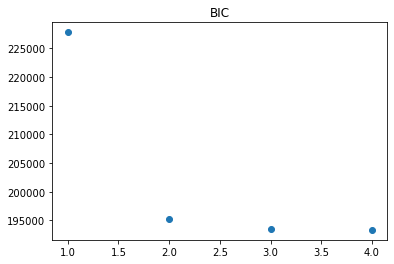

In [19]:
plt.scatter([1,2,3,4],[opt_model_1state.bic, opt_model_2state.bic, opt_model_3state.bic, opt_model_4state.bic])
plt.title("BIC")

Text(0.5, 1.0, 'ICL')

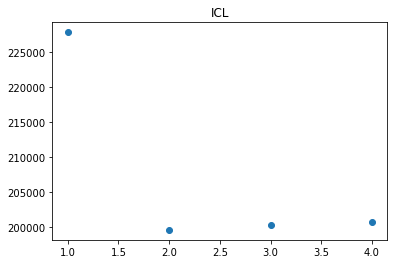

In [20]:
plt.scatter([1,2,3,4],[icl_1state, icl_2state, icl_3state, icl_4state])
plt.title("ICL")

The $ICL$ of the 2 state model is at a minimum, therefore it is most likely the ideal model. 

The $BIC$ continuously improves, but in our testing, this is usually the case, however, the improvement decreases with successive states- so you might choose a threshold, or like *Lerner2018*, use a modified $BIC$.

<font color="brown">*We've also noticed that the principle of the more data the better is especially true for H<sup>2</sup>MM analysis. So if you're seeing plateaus, especially in $ICL$, consider acquiring more data to make things clear.*</font>

So, let's see the ideal model:

In [21]:
opt_model_2state

nstate: 2, ndet: 2, nphot: 219275, niter: 46, loglik: -97592.85340210985 converged state: 3
prior:
0.24062456034531832, 0.7593754396546817
trans:
0.9999799835979322, 2.0016402067937808e-05
6.538917169641951e-06, 0.9999934610828304
obs:
0.354319513702607, 0.645680486297393
0.8854927791660938, 0.11450722083390623

<a id='15'></a>
## 1.5 `H2MM_arr` Function

Sometimes you don't want to optimize a model, but rather just get the *loglikelihood* or $BIC$ out of that model. Maybe you want to get a bunch of loglikelihoods against the same set of data.

For this, there is the `H2MM_arr` function, which has a very similar signature to that of `EM_H2MM_C`,  `viterbi_path`, and `viterbi_path`: `H2MM_arr(models,color,time)` The main difference is that `models` can be a `list`, `tuple`, NUMPY array of `h2mm_model` objects, or just a `h2mm_model` object.

#### <font color="brown">This can be used as a way to see how sharply the *loglikelihood* peaks around it's optimal value, which can help you estimate error bars.</font>

To do this, we'll first extract the model parameters, (`.prior`, `.trans`, and `.obs`) into separate arrays, and make several initial **models** from those, each with one value slightly tweaked (and renormalized), and then evaluate the *loglikelihood* with `H2MM_arr`:

#### <font color="gray">Setup the new models</font>

In [22]:
# extract prior, trans and obs
prior_opt = opt_model_2state.prior
trans_opt = opt_model_2state.trans
obs_opt = opt_model_2state.obs

# make copies of the array so the tweak can be applied
# we need to do "+ 0" so that the tweak arrays are separate copies in memory, you could also use the .copy() method
trans_tweak1 = trans_opt + 0
trans_tweak2 = trans_opt + 0
trans_tweak3 = trans_opt + 0
trans_tweak4 = trans_opt + 0

# let's tweak the value of trans[0,1], lets adjust it by 1e-7 up and down
trans_tweak1[0,1] = trans_opt[0,1] - 2e-7
trans_tweak2[0,1] = trans_opt[0,1] - 1e-7
trans_tweak3[0,1] = trans_opt[0,1] + 1e-7
trans_tweak4[0,1] = trans_opt[0,1] + 2e-7

# to renormalize, we'll have to do the oposite to [0,0]
trans_tweak1[0,0] = trans_opt[0,0] + 2e-7
trans_tweak2[0,0] = trans_opt[0,0] + 1e-7
trans_tweak3[0,0] = trans_opt[0,0] - 1e-7
trans_tweak4[0,0] = trans_opt[0,0] - 2e-7

# make the models
model_tweak1 = h2mm_model(prior_opt,trans_tweak1,obs_opt)
model_tweak2 = h2mm_model(prior_opt,trans_tweak2,obs_opt)
model_tweak3 = h2mm_model(prior_opt,trans_tweak3,obs_opt)
model_tweak4 = h2mm_model(prior_opt,trans_tweak4,obs_opt)

#### <font color="green">Now run `H2MM_arr` (Error Evaluation)</font>

In [23]:
# put the new models into a list
model_list = [model_tweak1, model_tweak2, opt_model_2state, model_tweak3, model_tweak4]
out_list = H2MM_arr(model_list,color,times)

#### Examine the results:
<font color="brown">*NOTE: the cell bellow takes advantage of feature of Python called list comprehension, if the syntax doens't make sense, check out this <a href="https://www.youtube.com/watch?v=3dt4OGnU5sM">tutorial</a>. it's a really powerful feature*.</font>

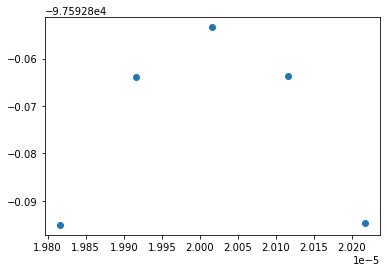

In [24]:
loglik = [model.loglik for model in out_list]
trans_rate = [model.trans[0,1] for model in out_list]
plt.scatter(trans_rate,loglik)

<a id='16'></a>
## 1.6 Bootstrap Error Calculation

An alternative method of error evaluation, which provides clearer results is to use the bootstrap method. For this, we define a simple function that takes subsets of our data, fits them, and then takes the standard deviation of each parameter in the `h2mm_model`.

Bellow is the simple function `h2mm_std` that does this.

The function signature is `h2mm_std(model,indexes,times,sub,**kwargs)`
where:
- the first 3 inputs are identical to that of `EM_H2MM_C`
- `sub`: an integer indicating how many bootstrap sets to use (this should be choosen to balance time and accuracy, larger numbers take more time but are more accurate to a point
- `**kwargs`: these are passed to the `EM_H2MM_C` function without modification (we'll get to kwargs later, see [Apendix (section 9.2)](#92) for a descrition of these options, these will be introduced in other parts of the tutorial as well.

In [25]:
def h2mm_std(model,indexes,times,sub,**kwargs):
    sub_model = []
    for i in range(sub):
        sub_model.append(EM_H2MM_C(model,indexes[i::sub],times[i::sub],**kwargs))
    std_prior = np.std(np.array([m.prior for m in sub_model]),axis=0)
    std_trans = np.std(np.array([m.trans for m in sub_model]),axis=0)
    std_obs = np.std(np.array([m.obs for m in sub_model]),axis=0)
    return std_prior, std_trans, std_obs

Now let's run this function and display the results:

In [26]:
std_prior, std_trans, std_obs = h2mm_std(opt_model_2state,color,times,20)
std_prior, std_trans, std_obs

The model converged after 34 iterations
The model converged after 34 iterations
The model converged after 41 iterations
The model converged after 45 iterations
The model converged after 45 iterations
The model converged after 52 iterations
The model converged after 51 iterations
The model converged after 46 iterations
The model converged after 57 iterations
The model converged after 42 iterations
The model converged after 39 iterations
The model converged after 54 iterations
The model converged after 34 iterations
The model converged after 45 iterations
The model converged after 43 iterations
The model converged after 35 iterations
The model converged after 42 iterations
The model converged after 48 iterations
The model converged after 44 iterations
The model converged after 45 iterations


(array([0.03741829, 0.03741829]),
 array([[4.6679488e-06, 4.6679488e-06],
        [1.5419640e-06, 1.5419640e-06]]),
 array([[0.02133362, 0.02133362],
        [0.00607557, 0.00607557]]))

<a id='2'></a>
# 2. The `h2mm_model` object

<a id='21'></a>
## 2.1 Accessing core `h2mm_model` parameters

We've already seen how to look at the *loglikelihood* and $BIC$ from an optimized `h2mm_model` with `model.loglik` and `model.bic`. But you can also look at the arrays that make up the model- those all important **initial probability**, **transition probability** and **emission probability** matrices. They are named basically the same as how we defined them:
 - `.prior` for the **initial probability**
 - `.trans` for the **transition probability**
 - `.obs` for the **emission probability**

Whenever you call one of these properties, Python will return a NUMPY array. You can even assign it to a new variable, but note that if you do, changing the values in that variable will **not** change the values in the model, <font color="teal">this is because under the hood, Python is actually handing you a copy of the array.</font>

#### <font color="green">The initial model</font>

In [27]:
prior_in = init_model_2state.prior
prior_in

array([0.5, 0.5])

In [28]:
trans_in = init_model_2state.trans
trans_in

array([[9.99999e-01, 1.00000e-06],
       [1.00000e-06, 9.99999e-01]])

In [29]:
obs_in = init_model_2state.obs
obs_in

array([[0.3, 0.7],
       [0.5, 0.5]])

#### <font color="green">The optimized model</font>

In [30]:
prior_opt = opt_model_2state.prior
prior_opt

array([0.24062456, 0.75937544])

In [31]:
trans_opt = opt_model_2state.trans
trans_opt

array([[9.99979984e-01, 2.00164021e-05],
       [6.53891717e-06, 9.99993461e-01]])

In [32]:
obs_opt = opt_model_2state.obs
obs_opt

array([[0.35431951, 0.64568049],
       [0.88549278, 0.11450722]])

Now, we can change values in these arrays, or do whatever else you want. Since these are **copies** we will not be changing anything in the **models**.

One of the most obvious things to do is to convert the the **transition probability matrix** into units of $s^{-1}$, instead of whatever the clock of the measurement is.
*Remember that `H2MM_C` treats the arrival times as integers, so you have to know what the difference in time is between time 1 and time 2. In many nsALEX experiments, the file will store arrival times this way, and will include a clock rate, the time between 1 and 2 is so many nanoseconds.*

Let's choose a value common to nsALEX measurements: $50ns$, in seconds this is $5.0*10^{-5}s$

In [33]:
# suppose the resoluiton of times is 50e-6 (50MHz), then dividing by that will give the transition rate in s^-1
clk_p = 5.0e-5
trans_opt = trans_opt/clk_p

print("trans_out = ")
print(trans_opt)
print("h_out.trans = ")
print(opt_model_2state.trans)

trans_out = 
[[1.99995997e+04 4.00328041e-01]
 [1.30778343e-01 1.99998692e+04]]
h_out.trans = 
[[9.99979984e-01 2.00164021e-05]
 [6.53891717e-06 9.99993461e-01]]


In [34]:
if np.all(trans_opt == opt_model_2state.trans):
    print("Changing trans_out changed opt_model_2state.trans")
else:
    print("Changing trans_out left opt_model_2state.trans the same")

Changing trans_out left opt_model_2state.trans the same


<a id='22'></a>
## <font color="gray">2.2 Review of `h2mm_model` Fields</font>

Now let's review what we've learned about the `h2mm_model` fields:
1. Model Definition: these are the values that define a model:
    - `.prior` the **initial probability matrix** is a 1D array, and has length of the number of states in the model, the sum of all values in this matrix should be 1, and none negative- it represents the probability of the system being in a given state at the beginning of a burst, so the system will be in a state at the beginning, and negative probabilities are meaningless)
    - `.trans` the **transition probability matrix** a 2D array, both dimensions being the number of states. Each row should sum to 1, as it represents the probability that if the system is in a state, what is the probability to transition to another state, so the system must transition to a state, even if it is to the same state (in fact staying in the same state is the most likely, which is why the diagonal of this matrix is usually close to 1)
    - `.obs` the **emission probability matrix** a 2D array with rows as the number of **states**, and columns the number of **streams** (see chapter 3, so far we have only dealt with 2 streams), the rows should sum to one, and none negative, as each row is the probability that if the system is in that state, it will emit a photon.
2. Likelihood Estimators (calculated from **data**, `.prior`, `.trans`, and `.obs`):
    - `.loglik`the *loglikelihood* (log of likelihood), of the model, useful for comparing two models with the same number of **states**, run against the same set of data. *Initial models (before calculation of loglik against **data**) have a value of `-inf`*
    - `.bic` the Bayesian Information Criterion, an assessment of the likelihood of the model, with penalties for the number of **states**, allows comparison of models with different numbers of **states**, (run against the same set of data). *Initial models (before calculation of loglik against **data** will raise an error if this field is called.*

<a id='23'></a>
## 2.3 Changing Values in a Model

When you access the values in an `h2mm_model` object, you do not change them.

But what if you have a new set of data, or something else, and you would like to change those values? Well, that can be done by passing an array into the field: 

- `model.prior = new_prior`
- `model.trans = new_trans`
- `model.obs = new_obs`

*NOTE the new array must be the **same** size, otherwise an error will be raised.*

It should also be noted that the `H2MM_C` API automatically resets the `.loglik` to `-inf` and the `.bic` will raise a warning, when you set the value of one of these fields. This is good because the model is no longer the same, and therefore a new *loglikelihood* must be calculated. Essentially when one of these fields is set, the model should be treated as an initial model, and this is how the `H2MM_C` API treats it.

#### <font color="green">Change the `.trans` property of an `h2mm_model` object:</font>

In [35]:
# make a new trans array
trans_new = np.array([[0.9999999,1e-7],[2e-7,0.9999998]])
# assign to the model
opt_model_2state.trans = trans_new
# display the model
opt_model_2state

nstate: 2, ndet: 2, nphot: 219275, niter: 0, loglik: -inf converged state: 0
prior:
0.24062456034531832, 0.7593754396546817
trans:
0.9999999, 1e-07
2e-07, 0.9999998
obs:
0.354319513702607, 0.645680486297393
0.8854927791660938, 0.11450722083390623

Note that the `.loglik` is now reset to `-inf`:

In [36]:
opt_model_2state.loglik

-inf

So, we should re-optimize this model.

<a id='setandeval'></a>
Since the model is no longer optimized, we should run `H2MM_arr` to get the new *loglikelihood.*

In [37]:
opt_model_2state = H2MM_arr(opt_model_2state,color,times)
opt_model_2state

nstate: 2, ndet: 2, nphot: 219275, niter: 0, loglik: -99919.33514418417 converged state: 2
prior:
0.24062456034531832, 0.7593754396546817
trans:
0.9999999, 1e-07
2e-07, 0.9999998
obs:
0.354319513702607, 0.645680486297393
0.8854927791660938, 0.11450722083390623

Now the *loglikelihood* is real:

In [38]:
opt_model_2state.loglik

-99919.33514418417

<a id='24'></a>
## 2.4 `h2mm_model` Methods

<font color="brown">To Matlab users: one of the biggest differences between Python and Matlab is that Python is "object oriented." Practically this means you can execute functions on a variable with the dot ("`.`") notation, which the functions available depend on the type of the variable, and these are generally called "methods"</font>

The `h2mm_model` object has a few methods, let's have a look at how to use them.

<a id='241'></a>
### 2.4.1 The `.copy()` method

In python, if we just execute `new_model = old_model` where `old_model` is a `h2mm_model` object, all we have really done is let ourselves refer to `old_model` in a new way. This means that if we change the `.prior`, `.trans` or `.obs` arrays in `new_model`, we will change those values in `old_model`.

#### Demonstrate Problem of using `new_model = old_model`

In [39]:
# get the current state of the trans model
old_trans = opt_model_2state.trans
# use the standard = operator without copy()
new_model = opt_model_2state
new_trans = np.array([[0.9999995,5e-7],[5e-7,0.9999995]])
new_model.trans = new_trans

# display the old model trans matrix, note that it changed
print("The current state of opt_model_2state.trans = ")
print(opt_model_2state.trans)
print("The old state of opt_model_2state.trans = ")
print(old_trans)
if np.all(old_trans == opt_model_2state.trans):
    print("The trans array is unchanged")
else:
    print("The trans array is changed")

The current state of opt_model_2state.trans = 
[[9.999995e-01 5.000000e-07]
 [5.000000e-07 9.999995e-01]]
The old state of opt_model_2state.trans = 
[[9.999999e-01 1.000000e-07]
 [2.000000e-07 9.999998e-01]]
The trans array is changed


Python has the `is` operator, which tells us if two variables point to the same object. Let's use it to prove the point a litle more clearly.

In [40]:
new_model is opt_model_2state

True

The `H2MM_C` API includes the `.copy()` method, which returns a **copy** of the entire model, with its values stored separately in memory (for the experienced Python programmer, it makes a *deep copy* of the data).

In [41]:
opt_model_2state = EM_H2MM_C(opt_model_2state,color,times)

The model converged after 44 iterations


#### <font color="green">Use the `.copy()` method</font>

In [42]:
# get the current state of the trans model
old_trans = opt_model_2state.trans
# use the copy() method
new_model = opt_model_2state.copy()
new_trans = np.array([[0.9999995,5e-7],[5e-7,0.9999995]])
new_model.trans = new_trans

# display the old model trans matrix, note that it changed
print("The current state of opt_model_2state.trans = ")
print(opt_model_2state.trans)
print("The old state of opt_model_2state.trans = ")
print(old_trans)
if np.all(old_trans == opt_model_2state.trans):
    print("The trans array is unchanged")
else:
    print("The trans array is changed")

The current state of opt_model_2state.trans = 
[[9.99979984e-01 2.00163874e-05]
 [6.53891251e-06 9.99993461e-01]]
The old state of opt_model_2state.trans = 
[[9.99979984e-01 2.00163874e-05]
 [6.53891251e-06 9.99993461e-01]]
The trans array is unchanged


Let's use the `is` operator again:

In [43]:
new_model is opt_model_2state

False

#### Practical example

Remember when we were evaluating the error, how we had to make a bunch of arrays and make new `h2mm_model` objects using them? Well, the `.copy()` method allows us to do this without having to extract all the arrays.

<a id='erroreval'></a>
#### <font color="blue">Error Evaluation with `.copy()`</font>

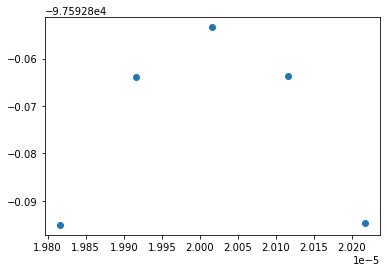

In [44]:
# make copies of the model for each tweaked model
model_tweak1 = opt_model_2state.copy()
model_tweak2 = opt_model_2state.copy()
model_tweak3 = opt_model_2state.copy()
model_tweak4 = opt_model_2state.copy()

# makes arrays for each tweak to adjust
trans_tweak1 = opt_model_2state.trans
trans_tweak2 = opt_model_2state.trans
trans_tweak3 = opt_model_2state.trans
trans_tweak4 = opt_model_2state.trans

# adjust the [0,1] element of the arrays
trans_tweak1[0,1] = trans_tweak1[0,1] - 2e-7
trans_tweak2[0,1] = trans_tweak2[0,1] - 1e-7
trans_tweak3[0,1] = trans_tweak3[0,1] + 1e-7
trans_tweak4[0,1] = trans_tweak4[0,1] + 2e-7

# adjust the [0,0] so that the arrays are row stochastic
trans_tweak1[0,0] = trans_tweak1[0,0] + 2e-7
trans_tweak2[0,0] = trans_tweak2[0,0] + 1e-7
trans_tweak3[0,0] = trans_tweak3[0,0] - 1e-7
trans_tweak4[0,0] = trans_tweak4[0,0] - 2e-7

# change the values in the trans arrays in the copies
model_tweak1.trans = trans_tweak1
model_tweak2.trans = trans_tweak2
model_tweak3.trans = trans_tweak3
model_tweak4.trans = trans_tweak4

# make a list out of the models
model_list = [model_tweak1, model_tweak2, opt_model_2state, model_tweak3, model_tweak4]
# evaluate the loglik for all the tweaked models
out_list = H2MM_arr(model_list,color,times)

loglik = [model.loglik for model in out_list]
trans_rate = [model.trans[0,1] for model in out_list]

plt.scatter(trans_rate,loglik)

In [45]:
trans_rate, loglik

([1.981638736549264e-05,
  1.9916387365492642e-05,
  2.001638736549264e-05,
  2.011638736549264e-05,
  2.0216387365492643e-05],
 [-97592.89509647088,
  -97592.8637989031,
  -97592.85340210932,
  -97592.8637321318,
  -97592.89461723418])

<a id='242'></a>
### 2.4.2 The `.evaluate` Method

Sometimes we'd like to just evaluate the *loglikelihood* of a given `h2mm_model` object against a set of **data**, and not have to make a separate object. We could use `model = H2MM_arr(model,color,time)`, but there is a cleaner way: the `.evaluate` method, which under the hood calls `H2MM_arr`, but  `.evaluate` is cleaner. (This is a better way to do what we did [here](#setandeval).)

<font color="brown">*For Matlab users: this will be a good example of how methods work in object oriented programming*</font>

The signature is basically the same: `model.evaluate(color,time)`

To demonstrate, let's make another model in our curve seeing how sharp the *loglikelihood* peak is around the transition rate.

#### <font color="gray">Make new tweaked model</font>

In [46]:
# make the new trans array
trans_tweak5 = opt_model_2state.trans

trans_tweak5[0,1] = trans_tweak5[0,1] + 3e-7
trans_tweak5[0,0] = trans_tweak5[0,0] - 3e-7
# update the model
model_tweak5 = opt_model_2state.copy()
model_tweak5.trans = trans_tweak5

#### <font color="green">Get the *loglikelihood* of a model with `.evaluate`</font>

In [47]:
model_tweak5.evaluate(color,times)
model_tweak4

nstate: 2, ndet: 2, nphot: 219275, niter: 0, loglik: -inf converged state: 0
prior:
0.24062452544309504, 0.759375474556905
trans:
0.9999797836126345, 2.0216387365492643e-05
6.538912507967943e-06, 0.999993461087492
obs:
0.35431952646977943, 0.6456804735302206
0.8854927726953505, 0.11450722730464952

Look at the `.loglik` specifically:

In [48]:
model_tweak5.loglik

-97592.94588786643

#### Let's add the new model to the list of models
<font color="brown">Matlab users: this is a good demonstration how Python list syntax works.</font>

In [49]:
out_list = out_list + [model_tweak5]

#### Now let's plot the updated list

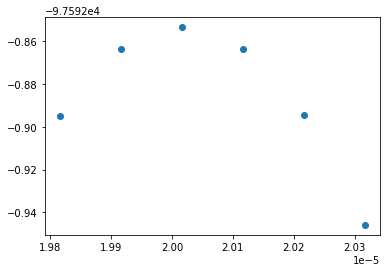

In [50]:
loglik = [model.loglik for model in out_list]
trans_rate = [model.trans[0,1] for model in out_list]
plt.scatter(trans_rate,loglik)

<a id='243'></a>
### 2.4.3 The `.optimize` Method

The `.optimize` does the same thing as `EM_H2MM_C`: find the optimal model for some **data**, but just as a method of an `h2mm_model` object. The function call is `model.optimize(color,time)` (very similar to `.evaluate`). 

Calling `model.optimize(color,time)` is the same as calling `model = EM_H2MM_C(model,color,time)`.

So let's try this, we'll make an un-optimized model, and then optimize it against our data using `.optimize` instead of `EM_H2MM_C`.

#### <font color="gray">Make an initial model</font>

In [51]:
prior = np.array([0.5,0.5])
trans = np.array([[0.999994,6e-6],[4e-6,0.999996]])
obs = np.array([[0.8,0.2],[0.5,0.5]])
model_2state = h2mm_model(prior,trans,obs)

#### <font color="green">Optimize with `.optimize`</font>

In [52]:
model_2state.optimize(color,times)
model_2state

The model converged after 44 iterations


nstate: 2, ndet: 2, nphot: 219275, niter: 44, loglik: -97592.85340210881 converged state: 3
prior:
0.7593754491018281, 0.24062455089817192
trans:
0.9999934610840924, 6.538915907626317e-06
2.0016398087704473e-05, 0.9999799836019123
obs:
0.8854927774144021, 0.11450722258559791
0.35431951715931465, 0.6456804828406852

<a id='244'></a>
### 2.4.4 `EM_H2MM_C` vs `.optimize` and `H2MM_arr` vs `.evaluate`: They're basically the same

The `h2mm_model` object method `.optimize` has basically the same function as the function `EM_H2MM_C`. <font color="teal">In fact, the API uses `EM_H2MM_C` to evaluate `.optimize`. The same is true of the `.evaluate` and `H2MM_arr` function.</font> So what you can do with one, you can do with the other. Which one you use is mostly a matter of preference. 

The main difference is that when you use `EM_H2MM_C`, a new `h2mm_model` object is created, so it uses a **tiny** bit more memory, but you keep the old model around in case you want to use it again. On the other hand when you use `.optimize`, the results are returned to the original model, so you save a **tiny** amount of memory, but that original model is no longer available.

Since `.evaluate` is also a wrapper around `.H2MM_arr`, the same principles apply, however, since the model parameters are not changed, it might seem like using `.evaluate` is the better choice unless we are wanting to compare the same model against differet **data** sets.

However, one more thing to be aware of is that the `H2MM_arr` function can also accept lists, tuples, and even NUMPY arrays of `h2mm_model` objects, and run them all against the same set of data. So it's a little more flexible in it's usage. Further, there is some preprocessing of the data that takes place before the main optimization. So if you have a lot of `h2mm_model` objects to evaluate, `H2MM_arr` will probably slightly faster, as this preprocessing takes place once if you use `H2MM_arr`, while if you `.evaluate` each model, the preprocessing will be unnecessarily repeated each for each model.

<a id='3'></a>
# <font color="red">3. Format of  Color and Time (Data)</font>

**This section is rather laborious and pedantic, many will be able to skip this section without much trouble**

OK, now that we have a basic idea of how the analysis works, let's get into the details of what everything is.

First, lets examine the **data**, i.e. the `color` and `times` lists (they can also be tuples).

The cell bellow that runs the Python function `type` on both to get the type of both.

In [53]:
type(color), type(times)

(list, list)

But we should check things a little further---

Think of these lists as matched pairs.
First, they have to be the same length, which we can check by calling the Python function `len`:

In [54]:
len(color), len(times)

(3865, 3865)

Now, let's look at just one burst:

In [55]:
color[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=uint64)

In [56]:
times[0]

array([66247004, 66247311, 66249978, 66250202, 66253542, 66255905,
       66256604, 66256918, 66257059, 66257134, 66258066, 66258563,
       66258893, 66258918, 66259202, 66259506, 66260065, 66260077,
       66260130, 66261420, 66262475, 66262641, 66263844, 66264374,
       66266166, 66272889, 66273341, 66274086, 66276504, 66282349,
       66283474, 66285693, 66286928, 66290256, 66294901, 66294976,
       66295146, 66295270, 66295378, 66295649, 66295694, 66295751,
       66296475, 66296573, 66297173, 66297778, 66298423, 66299748,
       66299934, 66300112, 66301696, 66303818, 66303870, 66304747,
       66305912, 66306027, 66306199, 66307329, 66308181, 66309858,
       66310821, 66310918, 66311214, 66312274, 66313168, 66313447,
       66313903, 66314331, 66315431, 66317914, 66318706, 66318724,
       66320771], dtype=uint64)

See how the `colors[0]` is switching between 0 and 1, while all the elements of `times[0]`

Some things to note about bursts:
 - `colors[0]` and `times[0]` are NUMPY **integer** arrays, and all values are **positive** <font color="teal">*these are even converted into unsigned integers in the code*</font>
 - Values in `times[0]` are always (monotonically) increasing, this is because the represent the arrival times of the photons, so photons must be "in order."
 - `colors[0]` is a seemingly random set of 0's and 1's. This is because they represent the index of the **stream** of each photon (i.e. 0 for Donor photons, and 1 for Acceptor photons)
 - The number of elements in `colors[0]` and `times[0]` is the same, because these are different aspects of the same photon

Now let's demonstrate that the same is true for all elements of the `color` and `times` lists, we'll use a nifty statement called `assert`, if it evaluates as false, then Python will raise an error and stop execution:

*For those coming from Matlab, the square brackets `[]` in Python indicate specifying an index, think of curly brackets and parenthesis `{}` and `()`*

In [57]:
# loop over the length of the array
for i in range(0,len(color)):
    # the type of c and t (elements of color and times) is the same, and the same as the first element of each
    assert type(color[i]) == type(times[i]) == type(color[0]) == type(times[0]), f"Types of index {i} do not match"
    # show that the sizes of color[i] and times[i] are the same
    assert color[i].size == times[i].size, f"Sizes at index {i} do not match"
print("All arrays of same type and sizes of color/times match")

All arrays of same type and sizes of color/times match


Note however that different bursts do not have to be the same size:

In [58]:
color[0].size, color[1].size

(73, 34)

<a id='4'></a>
# 4. Simulating Data

There is a final set of core functions in the H2MM_C API: the simulated trajectory functions.

The purpose of these functions is to provide a lightweight means to generate "simulated" data, by which we mean generating a random set of **states** and/or **streams** based on an input **model** and set of **times**. The reason an input set of **times** is nearly always needed is that a better set of times is better generated using a too like <a href="https://github.com/OpenSMFS/PyBroMo">PyBroMo</a>. In our examples, we will instead use the random number generators functions in <a href="https://numpy.org/">NUMPY</a> to generate quick-and-dirty **time** distributions. This works only as a first approximation.

<a id='41'></a>
## 4.1 Random Path Functions

The basic process is to work backwards, taking the **model** to generate a set of **states** (like those found in *Viterbi* analysis, and then generate the **streams** from those **states**.

<a id='411'></a>
### 4.1.1 Generating a Random State Path

The function to generate a **sate path** is `sim_sparsestatepath`, and the function call is fairly simple: `sim_sparsestatepath(model,times)` where `model` is the and `h2mm_model` object, and `times` is a 1D monotonically increasing positive integer NUMPY array- the times. For this example, we will generate `times` using the NUMPY function `np.random.exponential` which generates exponentially distributed random numbers, which is to a first approximation the way photons in a burst are distributed.

So lets generate a set of 50 **times**:

In [59]:
time_sim = np.cumsum(np.random.exponential(100,size=(50)))

#### <font color="green">Now we can make a random trajectory (we'll use the model from the 2 state fitting, `opt_model`:</font>

In [60]:
states = sim_sparsestatepath(opt_model,time_sim)
states

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint64)

Notice how the numbers are mostly consecutive? This is because, in this case, the transition rate is slow, so we expect changes of state only rarely.

<a id='412'></a>
### 4.1.2 Generating a Random Photon Path

But of course, we'd like to see what the actual data of the model might look like, as in the **streams** of the photons, not their **states**. To do this, we feed the resultant **states** into anotehr function: `sim_phtraj_from_state`, which has a very similar signature to the state generator function: `sim_phtraj_from_state(model, states)`, notice that we have swapped out the `times` array for the `states` array. This is becuase now we know the **state** of each simulated **photon**, so now we just need to use the randomly assign each photon based on the probability of a photon arrising in a given **stream** according to the **emmission probability** (`.obs`) matrix.

#### <font color="green">Make a **stream** trajectory from a **state path**</font>

In [61]:
streams = sim_phtraj_from_state(opt_model,states)
streams

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0], dtype=uint64)

Notice now that the numbers are much more random, this is because now we have the different **streams** all overlayed on top of each other.
<a id='413'></a>
### 4.1.3 Generating States and Streams Together

H2MM_C also provides a function that will do both steps in one, `sim_phtraj_from_times`, it's function call `sim_phtraj_from_times(model, times)`, note that this is the same as that of `sim_sparsestatepath`. But importantly, it returns both the `states` and `streams` arrays in the first and second registers.

#### <font color="green"> Generating a state path and streams from times</font>

In [62]:
states, streams = sim_phtraj_from_times(opt_model,time_sim)
states, streams

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1], dtype=uint64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0], dtype=uint64))

<a id='42'></a>
## 4.2 Setting the Random Seed

Since these simulations are based on random number generators, results will be different each time. However, if repeatability is desired, the seed of the random number generator can be set with the keyword argument `seed=int`. The same syntax is used across all three simulation functions.

Bellow is an example of a use of his keyword argument:

In [63]:
states, streams = sim_phtraj_from_times(opt_model,time_sim,seed=487)
states, streams

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1], dtype=uint64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0], dtype=uint64))

Now, if we use the same call, we will get the same result:

In [64]:
states, streams = sim_phtraj_from_times(opt_model,time_sim,seed=487)
states, streams

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1], dtype=uint64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0], dtype=uint64))

Note: once the seed is set, it is persitent, so once it is set, so long as the inputs are exactly the same, the subsequent results will also be the same:

In [65]:
# set the random seed
states, streams = sim_phtraj_from_times(opt_model,time_sim,seed=487)
# generate a second path
states, streams = sim_phtraj_from_times(opt_model,time_sim)
states, streams

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1], dtype=uint64),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0], dtype=uint64))

In [66]:
# set the random seed
states, streams = sim_phtraj_from_times(opt_model,time_sim,seed=487)
# generate a second path
states, streams = sim_phtraj_from_times(opt_model,time_sim)
states, streams

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1], dtype=uint64),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0], dtype=uint64))

<a id='43'></a>
## 4.3 Recreating Data

A final use-case is to use the simulation functions and the **times** of real data- this will let the user see if a given fit **model** properly describes the data (based on whatever statistics are relevant, eg. E and S).

#### <font color="blue">Simulating fit data based on burst times</font>

In [67]:
paths = []
streams = []
for tm in times:
    path_temp, stream_temp = sim_phtraj_from_times(opt_model,tm)
    paths.append(path_temp)
    streams.append(stream_temp)
paths[0],streams[0]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1], dtype=uint64),
 array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0], dtype=uint64))

<a id='5'></a>
# 5. Multiparameter H<sup>2</sup>MM

<a id='51'></a>
## 5.1 Working with more than 2 streams

The previous data used only 2 **streams** of data, so all the values in the `color` arrays were either 0 or 1. However, in many experiments, there will be more **streams**-- photons can be distinguished in a number of ways. <font color="brown">*(think donor vs acceptor excitation in addition to emission, or 3 color FRET, or even polarization)*</font>

So how do we handle this? Well, pretty simple, each new stream gets a new number (an index to be precise) in the `color` array. So if there are $n$ streams, they will be indexed successively from $i=[0, 1, ..., n-1]$.

So let's load a data set that has 3 **streams** (this is the same code as before, just a different file, and stored in the variables `color3` and `times3`)

**For your data, it's your job to export it, if you're using <a href="https://fretbursts.readthedocs.io/en/latest/">*FRETBursts*</a>, you should be able to copy-paste the `data_sort` function from the jupyter notebooks that go along with the mpH<sup>2</sup>MM Nature Communications paper.**

<a id='mpdata_sort'></a>
#### <font color="gray">Load 3 stream data</font>

In [68]:
color3, times3, nanotimes3 = data_sort(data)

Sorting photon channels...Slicing data into bursts...Done


#### <font color="red">Let's inspect a color array to show that it has 3 **streams**</font>

In [69]:
color3[0]

array([2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

See how instead of being a "random" set of 0's and 1's, it's now a "random" set of 0's, 1's and 2's? That means it's a 3 **stream** model.

<a id='52'></a>
## 5.2 Setting up the **emission probability matrix**

With 3 **streams** the **emission probability** matrix has 3 columns, instead of the 2 that it had with the previous 2 **stream** data. The **streams** and columns of a model must match, 3 **streams** 3 columns, 4 **streams** 4 columns. The **initial probability** and **transition probability** matrices are *unchanged*.

To demonstrate that only **emission probability** matrix changes, we'll use the **initial probability** and **transition probability** matrices we defined all the way back in [section 1.4](#14) (so make sure you've run those cells, otherwise this next cell won't work)

#### <font color="green">Define some new `.obs` arrays, and make 3 stream models</font>

In [70]:
# define the obs arrays
# note that these arrays all have 3 columns, meaning there are 3 streams in the data
obs_1state3 = np.array([[0.3,0.3,0.4]]) 
obs_2state3 = np.array([[0.5,0.1,0.4],[0.1,0.5,0.4]])
obs_3state3 = np.array([[0.4,0.4,0.2],[0.3,0.1,0.6],[0.2,0.4,0.4]])
obs_4state3 = np.array([[0.4,0.4,0.2],[0.3,0.1,0.6],[0.2,0.4,0.4],[0.1,0.1,0.8]])

# make the models
init_model_1state3 = h2mm_model(prior_1state,trans_1state,obs_1state3)
init_model_2state3 = h2mm_model(prior_2state,trans_2state,obs_2state3)
init_model_3state3 = h2mm_model(prior_3state,trans_3state,obs_3state3)
init_model_4state3 = h2mm_model(prior_4state,trans_4state,obs_4state3)

#### Run the optimization

<font color="brown">Note that other than making sure the number of **streams** in the data matches the number of columns in the **emission probability** matrix, optimization and *Viterbi* work exactly the same.</font>

In [71]:
opt_model_1state3 = EM_H2MM_C(init_model_1state3,color3,times3)
opt_model_2state3 = EM_H2MM_C(init_model_2state3,color3,times3)
opt_model_3state3 = EM_H2MM_C(init_model_3state3,color3,times3)
opt_model_4state3 = EM_H2MM_C(init_model_4state3,color3,times3)

The model converged after 8 iterations
The model converged after 47 iterations
The model converged after 97 iterations
The model converged after 163 iterations


#### Run *Viterbi* to get the $ICL$

In [72]:
path_1state3, scale_1state3, loglik_1state3, icl_1state3 = viterbi_path(opt_model_1state3,color3,times3)
path_2state3, scale_2state3, loglik_2state3, icl_2state3 = viterbi_path(opt_model_2state3,color3,times3)
path_3state3, scale_3state3, loglik_3state3, icl_3state3 = viterbi_path(opt_model_3state3,color3,times3)
path_4state3, scale_4state3, loglik_4state3, icl_4state3 = viterbi_path(opt_model_1state3,color3,times3)

#### Plot $BIC$

Text(0.5, 1.0, 'BIC')

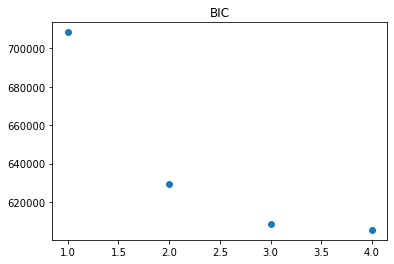

In [73]:
opt_model_list3 = [opt_model_1state3,opt_model_2state3,opt_model_3state3,opt_model_4state3]
bic3 = [model.bic for model in opt_model_list3]
plt.scatter([1,2,3,4],bic3)
plt.title("BIC")

#### Plot $ICL$

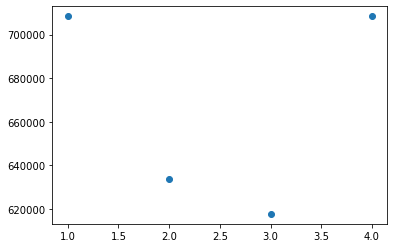

In [74]:
icl3 = [icl_1state3,icl_2state3,icl_3state3,icl_4state3]
plt.scatter([1,2,3,4],icl3)

So, it looks like the 3 state model is best for this set of data.

<a id='53'></a>
## 5.3 Checking a Model: `.ndet` and `.nstate` fields in `h2mm_model` objects

Since `h2mm_model` objects have a number of states based on the size of all their matrices, as well as a number of **streams**, based on the number of columns in their **emission probability** matrix (`.obs`). 

We could check the number of states by checking the shape of `.prior` or `.trans`, even `.obs`, and we could check the number of detectors by checking the shape of `.obs`

#### Check the states and streams of a model using the shapes of the `.trans` and `.obs` fields:

In [75]:
opt_model_2state3.trans.shape

(2, 2)

So this model has `.trans` of shape 2x2, so it is a 2 state model.

We could find this with `opt_model_2state3.prior.shape` as well.

If we look at the `.obs` field, we can get the number of **streams** as well:

In [76]:
opt_model_2state3.obs.shape

(2, 3)

So the shape is `(2, 3)` which means that it is a 2 state model for 3 **streams**.

#### There is a better way though:

The `h2mm_model` object has two special fields: `.nstate` and `.ndet` for the number of **states** and **streams** respectively.
#### <font color="green">Use `.nstate` and `.ndet` fields</font>

In [77]:
opt_model_2state3.nstate, opt_model_2state3.ndet

(2, 3)

These fields cannot be set, once a model is made, the number of **states** (`.nstate`) and **streams** is fixed (`.ndet`). These fields let us access these values in a streamlined way, which can be useful to make sure that a model has the appropriate number of streams for the data.

<a id='6'></a>
# 6  Converting model values into Human units
The numbers in the **transition probability matrix** and **emmision probability matrix** are somewhat obtuse, and so we need a way to convert them into useful $E$ and $S$ values.

<a id='61'></a>
## 6.1 Transition probability matrix
The **transition probability matrix** has only very small numbers except on the diagonal, this is because the units of this matrix are based on the clock time of the photon arrival times (specifically these values are in the unit of the inverse of the clock time), and not in a more familiar unit like $s^{-1}$ that we are used to dealing with. FRETBursts stores the clock time of the experiment in the `Data` object field `.clk_p`, (in units of $s$).

So to convert the values in the transition probability matrix into units of $s^{-1}$, we therefore must divide it by `data.clk_p`.

#### <font color="green">Convert transtion rates to units of $s^{-1}$</font>

In [78]:
opt_model.trans / data.clk_p

array([[1.99995997e+07, 4.00328041e+02],
       [1.30778343e+02, 1.99998692e+07]])

<a id='62'></a>
## 6.2 $E$ and $S$ from the emmission probability matrix

Remember that each column of the **emission probability matrix** (`.obs`) identifies a photon stream, and each row identifies a state. Therefore, for a given state (row) each column cooresponds to the uncorrected intensity of that photon stream in that state. Therefore, we simply apply the same formulas for $E_{raw}$ and $S_{raw}$ as in standard FRET analysis.

$E_{raw} = \frac{n^{A}_{D}}{n^{A}_{D} + N^{D}_{D}} = \frac{obs[i,1]}{obs[i,1]+obs[i,0]}$

and 

$S_{raw} = \frac{n^{A}_{D} + n^{D}_{D}}{n^{A}_{D} + n^{D}_{D} + n^{A}_{A}} = \frac{obs[i,1]+obs[i,0]}{obs[i,1]+obs[i,0]+obs[i,2]}$

#### <font color="green">Calculate $E_{raw}$ </font>

In [79]:
E = opt_model_3state3.obs[:,1] / (opt_model_3state3.obs[1,:])
E

array([0.14432831, 1.        , 0.60302459])

#### <font color="green">Calculate $S_{raw}$

In [80]:
S = (opt_model_3state3.obs[:,1]+opt_model_3state3.obs[:,0])/(opt_model_3state3.obs[:,1]+opt_model_3state3.obs[:,0]+opt_model_3state3.obs[:,2])
S

array([0.96623546, 0.54532847, 0.41568263])

<a id='63'></a>
## 6.3 Automated functions for calculations

The above lines can be rather tedious to construct every time, and futher, addition correction factors for leakage, direct excitation, $\gamma$ and $\beta$ are not applied.

It is often easier to have a function that converts the `h2mm_model` parameter values into arrays of transition rates in seconds, and the $E$ and $S$ values.

The signature is:

`get_ES(model,data)`
- `model` is an `h2mm_model` object
- `data` can either be a FRETBursts `Data` object, or simply the clock period, from `data.clk_p`. If you have defined the correction factors, supplying a `Data` object will result in the values having these corrections applied. If the corrections are not applied, or `data.clk_p` is supplied, then the results will give $E_{raw}$ and $S_{raw}$.

`get_ES` returns
- `trans` the transition probability matrix, in units of $s^{-1}$
- `ES` contains the $E$ values in the first column, and the $S$ values in the second column, if you are using mpH2<sup>2</sup>MM, if you are using spH<sup>2</sup>MM, then it returns a 1D array of the $E$ values. Note: the values are raw if you have not evaluated any of the correction factors, or if you supply only the clock rate, otherwise, the values will be corrected for whatever correction factors have been calculated.

In [81]:
def get_ES(h_mod,dat):
    """
    Function for calculating the transition rates, E and S values from a fit model, and the data object.
    Applies dir_ex, leakage, gamma, and beta corrections according to the values stored in the data object.
    Agruments:
    h_mod: h2mm_model
        A fit h2mm_model object
    dat: float, or data object
        The clk_p of the input data, or a data object, if it is a data object, the dir_ex, leakage, gamma 
        and beta correctios will be applied.
    Returns:
        trans: NUMPY float array
            the transition probability matrix, scaled to be in units of s^-1
        ES: Numpy float array
            The E and S values of the model, first column is the E values, second the S, if a 2 stream model,
            then the returned array will be 1D of E values. dir_ex, leakage, gamma, beta correctiosn are applied.
    """
    if type(dat) == Data:
        lk = dat.leakage
        dir_ex = dat.dir_ex
        gamma = dat.gamma
        beta = dat.beta
        clk_p = dat.clk_p
    elif type(dat) == dict:
        lk = dat['leakage']
        dir_ex = dat['dir_ex']
        gamma = dat['gamma']
        beta = dat['beta']
        clk_p = dat['clk_p']
    else:
        lk = 0.
        dir_ex = 0.
        beta = 1.
        gamma = 1.
        clk_p = dat
    if h_mod.ndet != 2 and h_mod.ndet != 3:
        raise ValueError('Number of streams not supported')
    trans = h_mod.trans / clk_p
    F_dd = h_mod.obs[:,0]
    if h_mod.ndet == 3:
        F_dd = h_mod.obs[:,0]
        F_aa = h_mod.obs[:,2]
        F_fret = h_mod.obs[:,1] - (lk * F_dd) - (dir_ex * F_aa)
        E = F_fret / ((gamma * F_dd) + F_fret)
        S = (F_fret + (gamma * F_dd)) / ( F_aa/beta + (F_fret + (gamma * F_dd)))
        ES = np.array([E,S]).T
    elif h_mod.ndet ==2:
        F_dd = h_mod.obs[:,0]
        F_fret = h_mod.obs[:,1] - (lk * F_dd)
        F_fret = F_fret - lk * F_dd
        ES = F_fret / ((gamma*F_dd) + F_fret)
    return trans, ES

#### <font color="green">Use `get_ES` to make human readable values</font>

In [82]:
trans_seconds_3state3, ES_3state3 = get_ES(opt_model_3state3,data)
trans_seconds_3state3, ES_3state3

(array([[1.99997906e+07, 1.69802068e+02, 3.95808633e+01],
        [9.94812756e+01, 1.99996698e+07, 2.30709587e+02],
        [4.40336184e+01, 4.15461174e+02, 1.99995405e+07]]),
 array([[0.06833174, 0.96623546],
        [0.16112788, 0.54532847],
        [0.65958521, 0.41568263]]))

<a id='7'></a>
# 7. Controlling `EM_H2MM_C`

<a id='71'></a>
## 7.1 Convergence

At it's core, **H<sup>2</sup>MM** is an optimization. Further, the mathematics and algorithm is formulated such that whenever the loglikelihood of a model is calculated, a new model is also generated, which is mathematically guaranteed to have a better *loglikelihood* than the previous model, unless the maximum has been reached. (The model is said then to have converged).

Two (and sometimes related) issues arise:
1. Floating point errors 
    - The term "maximum" needs a little wiggle room, the models with differences in *loglikelihood* smaller than the floating point error should be considered as of equal quality.
2. Long optimization
    - Coming to the "maximum" *loglikelihood* takes a very large number of iterations, and usually the differences both in values and *loglikelihoods* are minor.
     - This issue most often happens for large numbers of states, and overfit models.

The solution comes by setting a maximum number of iterations the optimization will proceed, and setting a small, but non-zero threshold for the difference between *loglikelihoods* at which to consider sufficient to consider the optimization to have converged.

By default, `EM_H2MM_C` will stop optimizing after 3600 iterations, and considers a difference in *loglikelihood* of $10^{-14}$ to be small enough to consider the optimization to have converged.

These values can be overiden with the `max_iter` and `converged_min` keyword arguments (aka kwargs). 

*For Matlab users: keyword arguments are optional arguments with a default value. These are specified inside the parenthesis after a function, after all the normal arguments, and specified as `kwarg=value`*

#### <font color="green">Changing `max_iter`</font>

In [83]:
small_opt_model_3state = EM_H2MM_C(init_model_3state, color, times, max_iter=500)

Optimization reached maximum number of iterations


#### <font color="green">Changing `converged_min`</font>

In [84]:
large_conv_model_3state = EM_H2MM_C(init_model_3state, color, times, converged_min=4e-6)

The model converged after 1061 iterations


There is a final keyword argument that can help control the length of optimization: `max_time`. It does almost as advertised, if the optimization goes over the time (which is in seconds), the optimization will stop at whatever model is currently being calculated.

<font color="brown">**HOWEVER** `max_time` *uses an **inaccurate clock**, which tends to run **fast** so it's use is not recommended*</font>

By default `max_time` is infinity, and so a model will never time out.

<a id='711'></a>
### 7.1.1 Using `.optimize` instead

The `.optimize` method takes the same keyword arguments as `EM_H2MM_C`, in the cell below, try using them to prove it to yourself.

In [85]:
# make a new model for yourself to use as a guinea pig
play_model = h2mm_model(prior_3state,trans_3state,obs_3state3)
# perform the optimization
play_model.optimize(color3,times3,max_iter=800)

The model converged after 96 iterations


<a id='72'></a>
## 7.2 Limits


Sometimes we may want to restrain what values are possible in the H<sup>2</sup>MM model, for instance to keep transition rates within reasonable values, or because you know something about how the emmission probability matrix (`obs`) should behave.

<font color="brown">This is expected to happen most often (but not exclusively) when some experimental parameter is periodic, but not important to the data. For instance in $\mu$sALEX experiments, the laser alternation period causes donor and acceptor excitation photons, which arrive in separate streams to alternate (and thus transition) perfectly periodically, yet that has no bearing on transitions between our system. Thus transition rates close to the rate of laser alternation are likely to be artifacts, and thus we want to exclude them. For $\mu$sALEX experiments, we find this still is not enough, </font> 

<a id='721'></a>
### 7.2.1 Our First Bounded Fit

To define some bounds, we need to define the bounds, this is done using the `h2mm_limits` object, which we pass into the `EM_H2MM_C` function through the keyword argument `bounds`, and we also need to supply a method string to another keyword argument, `bounds_func`.

Let's see an example, and then explain:
#### <font color="green">Make an `h2mm_limits` object</font>

In [86]:
alt_period = 4000 # a fake alternation period
us_bounds = h2mm_limits(max_trans = 1/(alt_period))

#### <font color="green">Run Optimization with bounds</font>

In [87]:
# run optimization with bounds
us_opt_model3 = EM_H2MM_C(init_model_3state3,color3,times3, bounds_func='revert',bounds=us_bounds)
us_opt_model3

The model converged after 97 iterations


nstate: 3, ndet: 3, nphot: 359379, niter: 97, loglik: -304119.15389610565 converged state: 3
prior:
0.26206447279132344, 0.4970277567034882, 0.2409077705051884
trans:
0.9999895308534202, 8.490103413603815e-06, 1.9790431662022657e-06
4.974063781618979e-06, 0.9999834904568747, 1.153547934363465e-05
2.2016809201016446e-06, 2.0773058721686628e-05, 0.9999770252603583
obs:
0.9002109059941271, 0.06602455183715063, 0.03376454216872223
0.4574608510340146, 0.08786761926149377, 0.45467152970449154
0.14150451251018564, 0.27417811499045996, 0.5843173724993543

So, what did we just do? The `h2mm_limits` object `us_bounds` prevents any value (off the diagonal) of the **transition probability** matrix (`.trans`) from ever being larger (i.e. faster transition rate) than `1/(4000)`. 

#### Bounds process
When you use a bounds method, each iteration goes through the following steps:
1. Calculate *loglikelihood* and new model
2. Check if the **model** converged
3. Analyze the **new model**, and correct if necessary
    1. Check if any values are smaller or larger than a pre-set minimum or maximum
    2. If values are out of bounds, apply correction, method defined by argument passed to `bounds_func`
4. Repeat optimization (back to step 1)

<a id='722'></a>
### 7.2.2 The `h2mm_limits` object

`h2mm_limits` objects are designed specifically to be a flexible container for defining minimum and maximum values for elements of any and/or all of the `.prior`, `.trans`, and `.obs` arrays in an `h2mm_model` object during optimization.

Notice that all arguments passed to `h2mm_limits()` are **keyword arguments**. Names are fairly obvious, with a `min_` or `max_` placed before the array name to define the minimum or maximum values respectively, so we have:
- `min_prior` and `max_prior` to bound the `.prior` array
- `min_trans` and `max_trans` to bound the `.trans` array
- `min_obs` and `max_obs` to bound the `.obs` array

If an argument is not specified, the default argument is either 0 or 1 for `min_` and `max_` which are the minimum and maximum possible in any **model**, so the bound imposes no practical limit to those values.

These can be specified either as single floats (decimal number), or as arrays.

Specifying as a float will mean that:
1. All values will be bounded by the same minimum or maximum
    - For the `.trans` array, the values on the diagonal are ignored, as these will nearly always be close to 1
2. The same `h2mm_limits`object can be used with `h2mm_model` objects with different **states** and **streams**

Specifying as an array will mean that:
1. Each element of the given array will be bounded separately, allowing greater precision
    - `.trans` diagonals are ignored
2. The `h2mm_limits` object will only be able to be used with certain `h2mm_model` objects.
    - If any of the following `min_prior`, `max_prior`, `min_trans` or `max_trans` is specified as an array, then the `h2mm_limits` object must be used to optimize a `h2mm_model` object that has the same number of states
    - If `min_obs` or `max_obs` is specified, then the `h2mm_limits` object can only be used to optimize `h2mm_model` objects with the same number of **states** and **streams**

In the previous example, we specified `max_trans` as a float. Therefore, it can be used to bound just about any model:

#### <font color="green">Bounding several different models, with different numbers of streams and states:</font>

In [88]:
us_opt_model_1state = EM_H2MM_C(init_model_1state,color,times, bounds_func='minmax',bounds=us_bounds)
us_opt_model_2state = EM_H2MM_C(init_model_2state,color,times, bounds_func='minmax',bounds=us_bounds)
us_opt_model_3state = EM_H2MM_C(init_model_3state,color,times, bounds_func='minmax',bounds=us_bounds)
us_opt_model_1state3 = EM_H2MM_C(init_model_1state3,color3,times3, bounds_func='minmax',bounds=us_bounds)
us_opt_model_2state3 = EM_H2MM_C(init_model_2state3,color3,times3, bounds_func='minmax',bounds=us_bounds)
us_opt_model_3state3 = EM_H2MM_C(init_model_3state3,color3,times3, bounds_func='minmax',bounds=us_bounds)

The model converged after 3 iterations
The model converged after 46 iterations
The model converged after 2869 iterations
The model converged after 5 iterations
The model converged after 46 iterations
The model converged after 100 iterations


#### But, if we specify a different parameter with an array, then only matching models can be used:
This time, let's work with the `min_obs` and `max_obs` arrays. This will restrict the individual states of the `.obs` matrix vary within certain ranges, each state to a different area. 
<font color="brown">*This could be used for instance if we want to have only one state in a given area of the multi-dimensional space of the **emission probability** matrix, and all the other states in some other area of that range.*</font>

In [89]:
# define minimum and maximum arrays for obs, this will be a 4 state 3 detector model
obs_min = np.array([[0.0,0.0,0.0],[0.1,0.0,0.3],[0.0,0.1,0.4],[0.0,0.0,0.7]])
obs_max = np.array([[1.0,0.5,1.0],[0.6,0.3,0.7],[0.6,0.8,0.8],[1.0,1.0,1.0]])
# make the limit object
obs_limit = h2mm_limits(min_obs=obs_min, max_obs=obs_max)

#### Run the optimization

In [90]:
obs_opt_model_4state3 = EM_H2MM_C(init_model_4state3,color3,times3,bounds=obs_limit,bounds_func='minmax')
obs_opt_model_4state3

The model converged after 162 iterations


nstate: 4, ndet: 3, nphot: 359379, niter: 162, loglik: -302568.513451651 converged state: 3
prior:
0.2624867680090151, 0.4750782686449535, 0.19453899914581005, 0.06789596420022123
trans:
0.9999900455865949, 7.073006445697095e-06, 6.717515648740919e-07, 2.2096553945611606e-06
4.159930221970181e-06, 0.9999797853934209, 8.121672906211897e-06, 7.93300345088812e-06
1.0600072684651387e-06, 1.7492826795582405e-05, 0.9999798376978876, 1.6094680483980213e-06
1.0063314295563244e-05, 5.501290758923849e-05, 6.572835124467994e-06, 0.9999283509429907
obs:
0.9000234191622914, 0.06611324631802001, 0.03386333451968855
0.46818105706515795, 0.0899629673879175, 0.4418559755469246
0.15367167020379888, 0.308940980776639, 0.5373873490195621
0.0860137033595781, 0.07397313518576168, 0.8400131614546601

<a id='723'></a>
### 7.2.3 `bounds_func` Options

There are several methods for "correcting" a new model that has "out of bounds" values. We can choose which one to use with the `bounds_func` keyword argument. These are all identified with strings.

Our options are:
- `'minmax'` when a value is out of bounds, it is set to the minimum or maximum depending on which was exceeded
- `revert` resets the value to what it was in the current model (the one whose *loglikelihood* was just calculated
- `revert_old` resets the value to the value in the model that preceded the current one in optimization

<font color="brown">How to choose between these three functions? It depends on what we want to limit/achieve. `'minmax'` will tend to just keep the values at their minimums/maximums, so it's great if we just don't want to optimize for really slow transition rates that are longer than our experiment, and thus never happen and therefore their values are more likely statistical noise. `'revert'` on the other hand will be more likely to be "pushed off" the path it was going and find a local maxima in the *loglikelihood*, away from artifacts produced by some experimental periodicity. But it also carries the greater risk of premature convergence. `'revert_old'` is basically just more extreme, even more likely to find a local maxima in *loglikelihood*, but also more likely to converge prematurely.</font>

#### <font color="green">Using an alternative `bounds_func` option</font>
*Try switching it between the different options*

In [91]:
usminmax_opt_model_2state3 = EM_H2MM_C(init_model_2state3,color3,times3, bounds_func='revert',bounds=us_bounds)
usminmax_opt_model_2state3

The model converged after 47 iterations


nstate: 2, ndet: 3, nphot: 359379, niter: 47, loglik: -314754.25199394947 converged state: 3
prior:
0.2870699507307229, 0.7129300492692772
trans:
0.999985392215059, 1.4607784941040825e-05
6.076318488448828e-06, 0.9999939236815115
obs:
0.8934346081269031, 0.06413216278621446, 0.04243322908688245
0.3386441830335501, 0.15333234244057842, 0.5080234745258716

Finally, be aware that `h2mm_limits` is very flexible, nearly any combination of min/max limits can be specified, and it can take mixing arrays and floats. The one limitation is that arrays must have matching **states** and **streams**. If conflicting arrays are given, an error will be raised, halting the Python script, and the conflict will need to be corrected. The `H2MM_C` API also checks for other potential conflicts in the value provided, i.e. a minimum cannot have a value greater than a maximum.

#### A `h2mm_limits` object with multiple types of array specified mixing array and float definitions:

In [92]:
comb_bounds = h2mm_limits(max_trans=1/alt_period, min_obs=obs_min,max_obs=0.99999)
comb_opt_model_2state3 = EM_H2MM_C(init_model_4state3,color3,times3, bounds_func='revert',bounds=comb_bounds)

The model converged after 160 iterations


<a id='73'></a>
## 7.3 Auto-generate Initial Model with `factory_h2mm_model` function

In [section 1.4](#wholeanalysis1), we had to define with all the arrays a new `h2mm_model` object for each number of **states** we wanted to optimize. This meant that if the system has 5 states, we'd have to define a 5<sup>th</sup> , and probably even a 6<sup>th</sup> model to be sure that 5 states is the best fit.

It is better to define initial models based on prior knowledge of the system, but especially when we have a large number of states, or are trying to fit several different data sets, this can be rather laborious.

The `H2MM_C` API contains a function to help us: `factory_h2mm_model`, which returns an initial `h2mm_model` object.

The basic signature is: `factory_h2mm_model(nstate,ndet)` where `nstate` is the number of **states** in the output model, and `ndet` is the number of **streams** in the output model.

<a id='731'></a>
### <font color="green">7.3.1 Use `factory_h2mm_model` to make initial model</a>
*Try changing the arguments, and see how it changes the **streams** and **states** of the model.*

In [93]:
f_init_model_3state3 = factory_h2mm_model(3,3)
f_init_model_3state3

nstate: 3, ndet: 3, nphot: 0, niter: 0, loglik: -inf converged state: 0
prior:
0.3333333333333333, 0.3333333333333333, 0.3333333333333333
trans:
0.9999800000000001, 9.999999999999999e-06, 9.999999999999999e-06
9.999999999999999e-06, 0.9999800000000001, 9.999999999999999e-06
9.999999999999997e-06, 9.999999999999997e-06, 0.99998
obs:
0.2, 0.6, 0.2
0.3333333333333333, 0.3333333333333333, 0.3333333333333333
0.42857142857142855, 0.14285714285714285, 0.42857142857142855

So let's re-write the code in [Section 1.4](#wholeanalysis1) using the `factory_h2mm_model`function:

<a id='fhmwrkflow'></a>
#### <font color="blue">Basic Analysis with `factory_h2mm_model` to generate models</font>

In [94]:
# load data (this is the same as before)
# load data
data = loader.photon_hdf5("HP3_TE300_SPC630.hdf5")
loader.alex_apply_period(data)
data.calc_bg(fun=bg.exp_fit,time_s=30, tail_min_us='auto', F_bg=1.7)
data.burst_search(m=10,F=6)
data.fuse_bursts(ms=0)
data = Sel(data,select_bursts.size,add_naa=True,th1=50)
data = Sel(data,select_bursts.size,th1=30)

color, times, nanotimes = data_sort(data,nchan=2)


# Define models using factory_h2mm_model
finit_model_1state = factory_h2mm_model(1,2)
finit_model_2state = factory_h2mm_model(2,2)
finit_model_3state = factory_h2mm_model(3,2)
finit_model_4state = factory_h2mm_model(4,2)


# Optimize each model
fopt_model_1state = EM_H2MM_C(finit_model_1state,color,times)
fopt_model_2state = EM_H2MM_C(finit_model_2state,color,times)
fopt_model_3state = EM_H2MM_C(finit_model_3state,color,times)
fopt_model_4state = EM_H2MM_C(finit_model_4state,color,times)


# calculate ICL
path_1state, scale_1state, ll_1state, icl_1state = viterbi_path(fopt_model_1state,color,times)
path_2state, scale_2state, ll_2state, icl_2state = viterbi_path(fopt_model_2state,color,times)
path_3state, scale_3state, ll_3state, icl_3state = viterbi_path(fopt_model_3state,color,times)
path_4state, scale_4state, ll_4state, icl_4state = viterbi_path(fopt_model_4state,color,times)

# Total photons (after ALEX selection):    11,414,157
#  D  photons in D+A excitation periods:    5,208,392
#  A  photons in D+A excitation periods:    6,205,765
# D+A photons in  D  excitation period:     6,611,308
# D+A photons in  A  excitation period:     4,802,849

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A]
 - - - - - CHANNEL  1 - - - - 
 --> END Fused 35558 bursts (20.0%, 9 iter)

 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A and FRET]
Sorting photon channels...Slicing data into bursts...Done
The model converged after 2 iterations
The model converged after 45 iterations
The model converged after 2934 iterations
The model converged after 2583 iterations


<a id='732'></a>
### 7.3.2 Bounds and `factory_h2mm_model`

The `factory_h2mm_model` function however can create problems when we are also bounding the values with `h2mm_limits` objects ([section 5.2](#52)). As it might generate a model with values that are out of the defined bounds. This will result in `EM_H2MM_C` potentially behaving oddly. This issue can be avoided by supplying the `h2mm_limits` object to `factory_h2mm_model` through the keyword argument `bounds`.

#### <font color="green">Factory model with bounds</font>

In [95]:
us_bounds = h2mm_limits(max_trans = 1/4000)
binit_model_3state3 = factory_h2mm_model(3,3,bounds=us_bounds)
binit_model_3state3

nstate: 3, ndet: 3, nphot: 0, niter: 0, loglik: -inf converged state: 0
prior:
0.3333333333333333, 0.3333333333333333, 0.3333333333333333
trans:
0.9999, 5.000000000000004e-05, 5.000000000000004e-05
5.000000000000004e-05, 0.9999, 5.000000000000004e-05
5.000000000000004e-05, 5.000000000000004e-05, 0.9999
obs:
0.2, 0.6, 0.2
0.3333333333333333, 0.3333333333333333, 0.3333333333333333
0.42857142857142855, 0.14285714285714285, 0.42857142857142855

**The `h2mm_limits` object used for bounding should always be supplied to `factory_h2mm_model`**

<a id='733'></a>
### 7.3.3 Distribution kwargs in `factory_h2mm_model`

There are a few additional keyword arguments to control how `factory_h2mm_model` distributes the values in the matrices of the output `h2mm_model` object.

These are: 
- `prior_dist` valid values are `'even'` or `'random'`
- `trans_dist` valid values are `'even'` or `'random'`
- `obs_dist` valid values are `'even'` or `'random'`

which set how values are distributed in the `.prior`, `.trans` and `.obs` arrays. There are only two possible inputs to these: `'even'` and `'random'` (both stings).

When the value is set to `'even'` (the default), then values are evenly distributed inside the respective arrays.

When `'random'` is chosen on the other hand, values will be assigned randomly in the respective arrays.

<font color="brown">`'even'` is usually a better choice, as the output is predictable, and an even distribution is generally a better starting point for optimization. `'random'` is useful for generating multiple initial **models** of the same **states** and **streams** to check if optimization finds the local or global maximum for the data. Further, occasionally when the `min_obs` or `max_obs` of the `bounds` are specified as arrays, setting `obs_dist` to `'random'` may be beneficial</font>

A final keyword argument, `trans_scale` is a float, and sets the off-diagonal values of the **transition probability** matrix (`.trans`). If `trans_dist = 'even'` and the default value does not conflict with the `bounds` input, then all off-diagonal values will be set to `trans_scale`, if `trans_dist = 'random'` then the values will be random, but centered around `trans_scale`.

With all this information, it is now possible to re-write our analysis to limit the model transition rates for $\mu$sALEX measurements, while also using the `factory_h2mm_model` function:

<a id='734'></a>
### <font color="blue">7.3.4 Full analysis with bounds and `factory_h2mm_model`</font>

# Total photons (after ALEX selection):    11,414,157
#  D  photons in D+A excitation periods:    5,208,392
#  A  photons in D+A excitation periods:    6,205,765
# D+A photons in  D  excitation period:     6,611,308
# D+A photons in  A  excitation period:     4,802,849

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A]
 - - - - - CHANNEL  1 - - - - 
 --> END Fused 35558 bursts (20.0%, 9 iter)

 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A and FRET]
Sorting photon channels...Slicing data into bursts...Done
The model converged after 4 iterations
The model converged after 48 iterations
The model converged after 99 iterations
The model converged after 179 iterations


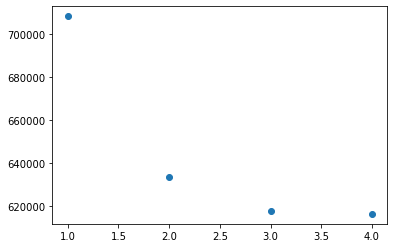

In [96]:
# load data (this is the same as before)
# load data
data = loader.photon_hdf5("HP3_TE300_SPC630.hdf5")
loader.alex_apply_period(data)
data.calc_bg(fun=bg.exp_fit,time_s=30, tail_min_us='auto', F_bg=1.7)
data.burst_search(m=10,F=6)
data.fuse_bursts(ms=0)
data = Sel(data,select_bursts.size,add_naa=True,th1=50)
data = Sel(data,select_bursts.size,th1=30)

color3, times3, nanotimes3 = data_sort(data)


# Define bounds object
alt_period = 4000
us_bounds = h2mm_limits(max_trans=1/alt_period)


# Define models using factory_h2mm_model
finit_model_1state3 = factory_h2mm_model(1,3,bounds=us_bounds)
finit_model_2state3 = factory_h2mm_model(2,3,bounds=us_bounds)
finit_model_3state3 = factory_h2mm_model(3,3,bounds=us_bounds)
finit_model_4state3 = factory_h2mm_model(4,3,bounds=us_bounds)


# Optimize each model
fopt_model_1state3 = EM_H2MM_C(finit_model_1state3,color3,times3,bounds=us_bounds,bounds_func='revert')
fopt_model_2state3 = EM_H2MM_C(finit_model_2state3,color3,times3,bounds=us_bounds,bounds_func='revert')
fopt_model_3state3 = EM_H2MM_C(finit_model_3state3,color3,times3,bounds=us_bounds,bounds_func='revert')
fopt_model_4state3 = EM_H2MM_C(finit_model_4state3,color3,times3,bounds=us_bounds,bounds_func='revert')


# calculate ICL
path_1state3, scale_1state3, ll_1state3, icl_1state3 = viterbi_path(fopt_model_1state3,color3,times3)
path_2state3, scale_2state3, ll_2state3, icl_2state3 = viterbi_path(fopt_model_2state3,color3,times3)
path_3state3, scale_3state3, ll_3state3, icl_3state3 = viterbi_path(fopt_model_3state3,color3,times3)
path_4state3, scale_4state3, ll_4state3, icl_4state3 = viterbi_path(fopt_model_4state3,color3,times3)

plt.scatter([1,2,3,4],[icl_1state3,icl_2state3,icl_3state3,icl_4state3])

<a id='74'></a>
## 7.4 "Continuous" Analysis

In the above example, all optimizations were run together, then all *Viterbi* analysis This is more clear and easier to read, however, it makes it harder to add more **states** to the analysis, so it is often more convenient to optimize, perform *Viterbi*, and then decide whether to optimize with one more **state**, or if we are confident that we have found the optimal number of **states** (usually by seeing that one or more models are over-fit).

So bellow is an example of such code:

<a id='optwrkflow'></a>
### <font color="blue">Optimize -> *Viterbi* workflow:</font>

# Total photons (after ALEX selection):    11,414,157
#  D  photons in D+A excitation periods:    5,208,392
#  A  photons in D+A excitation periods:    6,205,765
# D+A photons in  D  excitation period:     6,611,308
# D+A photons in  A  excitation period:     4,802,849

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A]
 - - - - - CHANNEL  1 - - - - 
 --> END Fused 35558 bursts (20.0%, 9 iter)

 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A and FRET]
Sorting photon channels...Slicing data into bursts...Done
The model converged after 4 iterations
The model converged after 50 iterations
The model converged after 103 iterations
The model converged after 179 iterations


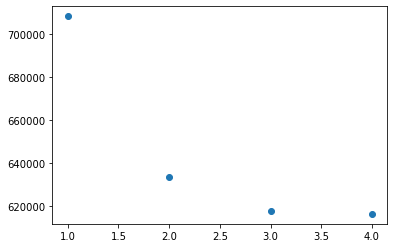

In [97]:
# load data (this is the same as before)
data = loader.photon_hdf5("HP3_TE300_SPC630.hdf5")
loader.alex_apply_period(data)
data.calc_bg(fun=bg.exp_fit,time_s=30, tail_min_us='auto', F_bg=1.7)
data.burst_search(m=10,F=6)
data.fuse_bursts(ms=0)
data = Sel(data,select_bursts.size,add_naa=True,th1=50)
data = Sel(data,select_bursts.size,th1=30)

color3, times3, nanotimes3 = data_sort(data)


# Define bounds object
alt_period = 4000
us_bounds = h2mm_limits(max_trans=1/alt_period)


# 1 state
finit_model_1state3 = factory_h2mm_model(1,3,bounds=us_bounds)
fopt_model_1state3 = EM_H2MM_C(finit_model_1state3,color3,times3,bounds=us_bounds,bounds_func='revert')
path_1state3, scale_1state3, ll_1state3, icl_1state3 = viterbi_path(fopt_model_1state3,color3,times3)

# 2 state
finit_model_2state3 = factory_h2mm_model(2,3,bounds=us_bounds)
fopt_model_2state3 = EM_H2MM_C(finit_model_2state3,color3,times3,bounds=us_bounds,bounds_func='revert')
path_2state3, scale_2state3, ll_2state3, icl_2state3 = viterbi_path(fopt_model_2state3,color3,times3)

# 3 state
finit_model_3state3 = factory_h2mm_model(3,3,bounds=us_bounds)
fopt_model_3state3 = EM_H2MM_C(finit_model_3state3,color3,times3,bounds=us_bounds,bounds_func='revert')
path_3state3, scale_3state3, ll_3state3, icl_3state3 = viterbi_path(fopt_model_3state3,color3,times3)

# 3 state
finit_model_4state3 = factory_h2mm_model(4,3,bounds=us_bounds)
fopt_model_4state3 = EM_H2MM_C(finit_model_4state3,color3,times3,bounds=us_bounds,bounds_func='revert')
path_4state3, scale_4state3, ll_4state3, icl_4state3 = viterbi_path(fopt_model_4state3,color3,times3)

plt.scatter([1,2,3,4],[icl_1state3,icl_2state3,icl_3state3,icl_4state3])

<a id='75'></a>
## <font color="blue">7.5 While loop analysis</font>

The following code is a full analysis, using all the main techniques we have learned. It is "smart" in analyzing the fitting results so that it only calculates enough states to be *relatively* confident that we have found the ideal model.

The basic algorithm is based on the following loop:
1. Create model with $n$ states
2. Optimize model
3. Calcualte $ICL$ with *Viterbi*
4. Compare all calculated models to test if the optimal model has been found
    1. Should have at least 1 model with more states than optimal $ICL$
    2. Should have minimum number of states calculated
    3. Set a maximum number of states to calculate- as a way to prevent over-long analysis

The following code also incorporates `h2mm_limits` and `factory_h2mm_model`.
In practice, it is preferred to define 1 to 4 or 5 state models manually, and then switch to `factory_h2mm_model` to define larger models. Note that now results are stored in lists

<a id='finaldemo'></a>
#### <font color="blue">Full loop-based analysis</font>

# Total photons (after ALEX selection):    11,414,157
#  D  photons in D+A excitation periods:    5,208,392
#  A  photons in D+A excitation periods:    6,205,765
# D+A photons in  D  excitation period:     6,611,308
# D+A photons in  A  excitation period:     4,802,849

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A]
 - - - - - CHANNEL  1 - - - - 
 --> END Fused 35558 bursts (20.0%, 9 iter)

 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A and FRET]
Sorting photon channels...Slicing data into bursts...Done
The model converged after 6 iterations
The model converged after 48 iterations
The model converged after 107 iterations
The model converged after 179 iterations
The model converged after 1168 iterations


nstate: 4, ndet: 3, nphot: 359379, niter: 179, loglik: -302568.51345167065 converged state: 3
prior:
0.1945387641077513, 0.0678962224762392, 0.4750783598515356, 0.2624866535644739
trans:
0.9999798377035722, 1.6095415468108299e-06, 1.7492750696491584e-05, 1.0600041844616573e-06
6.572991482945812e-06, 0.9999283499343855, 5.501395471194441e-05, 1.0063119419571254e-05
8.121640554484328e-06, 7.933191239823467e-06, 0.9999797852152515, 4.15995295407321e-06
6.717512603149669e-07, 2.2096163085795974e-06, 7.073047215413306e-06, 0.9999900455852156
obs:
0.1536717189656383, 0.30894108295191564, 0.5373871980824461
0.08601360219095734, 0.07397321005018505, 0.8400131877588577
0.4681812389991668, 0.08996298511848633, 0.4418557758823469
0.900023452580132, 0.06611324036484652, 0.033863307055021614

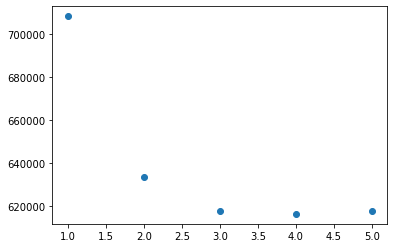

In [98]:
# Load data file
data = loader.photon_hdf5("HP3_TE300_SPC630.hdf5")
loader.alex_apply_period(data)
data.calc_bg(fun=bg.exp_fit,time_s=30, tail_min_us='auto', F_bg=1.7)
data.burst_search(m=10,F=6)
data.fuse_bursts(ms=0)
data = Sel(data,select_bursts.size,add_naa=True,th1=50)
data = Sel(data,select_bursts.size,th1=30)

color3, times3, nanotimes3 = data_sort(data)

# make bounds object
alt_period = 4000
us_bounds = h2mm_limits(max_trans=1/alt_period)

# setup lists for storing results
init_model = []
opt_model = []
path = []
scale = []
ll = []
icl = []
n = 1 # tracks number of states the model in the current iteration of the while loop should have
min_states = 4 # minimum number of states thas must be calculated
max_states = 8 # number of states beyond which to stop optimizing
cont = True

while cont:
    # make the n state model
    init_model_curr = factory_h2mm_model(n,3,bounds=us_bounds)
    init_model.append(init_model_curr) # append to list so we can inspect it later
    # optimize
    opt_model_curr = EM_H2MM_C(init_model_curr,color3,times3,bounds=us_bounds,bounds_func='revert')
    opt_model.append(opt_model_curr) # append to list so it can be examined at the end of the anlaysis
    # Viterbi
    path_curr, scale_curr, ll_curr, icl_curr = viterbi_path(opt_model_curr,color3,times3)
    # append results so they can be inspected later
    path.append(path_curr)
    scale.append(scale_curr)
    ll.append(ll_curr)
    icl.append(icl_curr)
    # Evaluate if we have sufficient knowledge to know if we have found the best fit model
    if n < min_states: # minimum number of models to optimize
        cont = True
        n += 1 # add 1 to n for next number of states to be calculated
    elif n > max_states: # don't optimize beyond some number of models
        cont = False
    elif np.min(icl) == icl_curr: # this says that the current icl is the minimum, therefore we do not have at least 1 overfit model
        cont = True
        n += 1 # add 1 to n for next number of states to be calculated
    else: # we have at least 1 overfit model, therefore we can stop optimizing
        cont = False

# evaluating the results
best_model_index = np.argmin(icl) # get index of lists of the "best" model, ie the one with the minimu ICL

# plot the ICL graph
plt.scatter(np.linspace(1,n,n),icl)
opt_model[best_model_index] # final display the "best model"

Now that the best model is found, we can then use `get_ES` to calcualte its $E_{raw}$ and $S_{raw}$ values (in this notebook we did not calculate any of the correction factors, if we had, we would be calculating $E$ and $S$ with these.

In [99]:
trans_second_opt, ES_opt = get_ES(opt_model[best_model_index],data)

<a id='8'></a>
# 8. Customizing `EM_H2MM_C`

The `EM_H2MM_C` function (and the `.optimize` method) has many options and ways to customize it's function. These are all specified through keyword arguments. So let's go through them.

<a id='81'></a>
## 8.1 Changing parallelization: the `num_cores` kwarg

The `EM_H2MM_C` algorithm is parallelized so it can use multiple cores on the computer. By default, the algorithm asks Python for the number of cores the machine has, and will limit itself to use only that many cores. But, for whatever reason, if we want to change this number, we have the keyword argument `num_cores`. 

<font color="brown">Why would we want to change `num_cores`? Maybe we have a  leave a core or two open for other applications because we have some other task running. Further, each system is a little different, and while the default should be close to optimum, we might be able to eek out a tiny bit better performance by changing `num_cores`</font>

Let's pretend we want to do a bunch of other things in other programs while `EM_H2MM_C` optimizes a model, so we'll use just one core, leaving the others free for our precious other programs. To do this, set `num_cores=1`.

#### <font color="green">Optimization using only one core</font>

In [100]:
onecore_model_3state3 = EM_H2MM_C(init_model_3state3,color3,times3,num_cores=1)
onecore_model_3state3

The model converged after 85 iterations


nstate: 3, ndet: 3, nphot: 359379, niter: 85, loglik: -304119.15389619314 converged state: 3
prior:
0.2620647175079298, 0.49702679257079085, 0.2409084899212793
trans:
0.9999895308729447, 8.49000938819231e-06, 1.979117667180087e-06
4.974009296558323e-06, 0.9999834905643271, 1.1535426376266991e-05
2.2017648118960628e-06, 2.0772942671177426e-05, 0.9999770252925169
obs:
0.9002108619695763, 0.06602454736217891, 0.03376459066824487
0.4574608563937248, 0.08786761387400516, 0.45467152973227
0.14150458376746097, 0.2741780588871942, 0.5843173573453447

Try playing with the number of cores, and with different initial models, and see how it affects the time.

*NOTE: changing the number of cores may cause the number of iterations before it converges to chnage, this is due to floating point errors. Check the actual results, and values of a 1 core vs n core optimization will differ by less than $10^{-10}$, the same can cause variation from optimization to optimization.*

<font color="brown">*In Jupyter notebooks, there are so-called "magic" commands, which start with % if applied to a single line, and %% to apply to an entire cell. The %%timeit magic can tell you how long it takes to execute a certain command, so it is included in the cell below to let you measure the time it takes for optimizations to run.*</font> 

In [101]:
%%timeit
onecore_model_3state3 = EM_H2MM_C(init_model_3state3,color3,times3,num_cores=1)

The model converged after 85 iterations
The model converged after 85 iterations
The model converged after 85 iterations
The model converged after 85 iterations
The model converged after 85 iterations
The model converged after 85 iterations
The model converged after 85 iterations
The model converged after 85 iterations
5.45 s ± 298 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


`num_cores` is also a keyword argument in `viterbi_path`, `viterbi_sort`, and `H2MM_arr`. In all cases the underlying operation is the same.

<font color="teal">For the Python programmer: The default value for `num_cores = os.cpu_count()//2` The `//2` is because most systems are hyperthreaded, especially the higher powered systems researchers are likely to be working on. Therefore `os.cpu_count()` will return twice as many physical cores as there really are. If your system is not hyperthreaded, then you will want to manually specify `num_cores`. But I've found that depending on which OS/distro I'm using, how exactly it handles the parallelization differs. Therefore some experimenting with `num_cores` is likely to gain you a little speed up over the default.</font>

<font color="magenta">For the **C** programmer: All parallelization is handeled at the **C** level. For Linux, `H2MM_C` uses pthreads, while in Windows, the CreateThread function is used. The value passed to `num_cores` is the number of threads the algorithm will use. To Python programmers, understand that in **C**, threads behave much more like Python processes, in that they can run simultaneously on multiple cores.</font>

<a id='82'></a>
## 8.2 Printing `EM_H2MM_C` iterations

So, what if we want to track the progress of an optimization? If you've been paying close attention to the console/terminal window, you will have noticed that 

```
Iteration 0 ...
Iteration 1 ...
Iteration 2 ...
...
```

gets printed to this window whenever `EM_H2MM_C` is running. This helps keep track of the optimization, wthout cluttering up the Jupyter Notebook. 

This behavior can be modified however with the `print_func` keyword argument. With this we have a number of options, that let us print to the Jupyter Notebook if we want a record of the iterations, or even silence all printing of progress completely, bellow, see the list of acceptable inputs:

<a id='821'></a>
### 8.2.1 Basic `print_func` options

- `'console'` the default, prints to the **console** window, provides basic information on the progress of the optimization 
- `'all'` prints a representation of the whole model to be optimized in the next iteration (this will be very verbose <font color="brown">This option is very verbose, use only if you want to see the exact steps of the optimization</font>
- `'diff'` Print the difference between the previous and current model logliklihoods and the current loglikelihood (this is the default if no `bounds` keyword argument is specified)
- `'comp'` Print the old and current loglikelihoods
- `'iter'` Prints only the iteration number- compact way to still track optimization progress in Jupyter Notebook
- `None` Suppresses all printing of iteration information, to both **console** and **jupyter notebook**

*If iterations show up in chunks when printing to a jupyter notebook, this is because the display to the Jupyter notebook is routed through a buffer, so what is printed to the notebook is often a few milliseconds behind, and multiple buffered messages get stored at once*

### Below you have an example, try changing it to the different options and see how it changes the output

In [102]:
print_opt_model_2state3 = EM_H2MM_C(init_model_2state3,color3,times3,print_func='diff')

Iteration:0, loglik:-343462.6508390914, improvement:inf iteration time:0.033482, total:0.033482
Iteration:1, loglik:-331401.6341989481, improvement:12061.016640143294 iteration time:0.030428, total:0.06391
Iteration:2, loglik:-328030.5126262105, improvement:3371.121572737582 iteration time:0.027999, total:0.091909
Iteration:3, loglik:-326313.1017488465, improvement:1717.4108773640473 iteration time:0.031432, total:0.123341
Iteration:4, loglik:-325005.9925981272, improvement:1307.1091507192468 iteration time:0.030645, total:0.153986
Iteration:5, loglik:-323826.61343886715, improvement:1179.3791592600755 iteration time:0.03526, total:0.189246
Iteration:6, loglik:-322636.6066578598, improvement:1190.0067810073378 iteration time:0.046201, total:0.235447
Iteration:7, loglik:-321358.5772186167, improvement:1278.0294392431388 iteration time:0.029487, total:0.264934
Iteration:8, loglik:-319944.27201478626, improvement:1414.3052038304158 iteration time:0.031044, total:0.295978
Iteration:9, logl

<a id='822'></a>
### 8.2.2 Customized display using your own function

There is one final type of argument that can be passed to `print_func`: a user-written function. When `EM_H2MM_C` detects that a function is passed to `print_func`, it will pass a specific set of arguments to that function:

`print_func(niter, new_model, current_model, old_model, t_iter, t_total)`

NOTE: It is not necessary, but recommended to keep these variable names in the function declaration.

where:
- `niter` is the number of iterations
- `new_model` is a `h2mm_model` object that represents the next model to be optimized (**before** checking for out of bounds values) note that its `.loglik` will be irrelevant because it has not been calculated yet.
- `current_model` is a `h2mm_model` object that represents the model whose `.loglik` was just calculated
- `old_model` is a `h2mm_model` object that represents the model from the previous iteration.
- `t_iter` is a float which is the time in seconds based on the **inaccurate C clock** that it took to calculate the latest iteration
- `t_total` is a float which is the time in seconds based on the **inaccurate C clock** that the full optimization has taken

We must write a function that accepts these arguments, and prints out whatever information we want to be displayed.

NOTE: This function should be short, just whatever pre-processing is needed and then a `print` statement.

#### <font color="green">Write a function to print the BIC of each iteration</font>

In [103]:
def bic_print(niter, new_model, current_model, old_model, t_iter, t_total):
    # the function signature needs to have the given order, but the names don't matter
    # however for readability, it's best just to keep the function signature exactly as is
    #print(f"The current BIC is {current.bic}, and we've been going for a full {t_total} seconds")
    print(f"Iteration:{niter}, the BIC is {current_model.bic}, iteration time {t_iter} seconds")
    # also, these functions will usually be really short, like this one, just a single print statement

Now, to pass this function, we just need to pass it to the `print_func` keyword argument **without** parenthesis.

<font color="brown">*For Matlab users, when Python sees a function name without parentheses, it does not try to execute it, rather it tells Python to pass that function along, and it can be called later by the function it was passed to.*</font>

#### <font color="green">Pass the `bic_print` function to `print_func` keyword argument</font>

In [104]:
bic_print_opt_model_2state3 = EM_H2MM_C(init_model_2state3,color3,times3,print_func=bic_print)

print_func validation...Iteration:1, the BIC is 48.35468695287496, iteration time 0.1 seconds
print_func validated
Iteration:0, the BIC is 687014.8466079419, iteration time 0.034501 seconds
Iteration:1, the BIC is 662892.8133276381, iteration time 0.030935 seconds
Iteration:2, the BIC is 656150.5701821647, iteration time 0.024794 seconds
Iteration:3, the BIC is 652715.7484274457, iteration time 0.032548 seconds
Iteration:4, the BIC is 650101.5301260074, iteration time 0.03407 seconds
Iteration:5, the BIC is 647742.7718074834, iteration time 0.032299 seconds
Iteration:6, the BIC is 645362.7582454671, iteration time 0.034126 seconds
Iteration:7, the BIC is 642806.699366983, iteration time 0.034162 seconds
Iteration:8, the BIC is 639978.0889593038, iteration time 0.036089 seconds
Iteration:9, the BIC is 637015.4034774726, iteration time 0.045708 seconds
Iteration:10, the BIC is 634283.9947491642, iteration time 0.037402 seconds
Iteration:11, the BIC is 632167.4739971885, iteration time 0.

<a id='83'></a>
## 8.3 User Defined Limits Function

When I said that the `bounds` keyword argument had to be `None` or a `h2mm_limits` object, and `bounds_func` had to be one of `None`, `'minmax'`, `'revert'`, or `'revert_old'`, well there is one exception: a function can be passed to `bounds_func`.

So let's first review how the optimization works:
When you use a bounds method, each iteration goes through the following steps:
1. Calculate *loglikelihood* and new model
2. Check if model converged
3. Analyze the new model, and correct if necessary
    1. Check if any values are smaller or larger than a pre-set minimum or maximum
    2. If values are out of bounds, apply correction, method defined by argument passed to `bounds_func`

When `EM_H2MM_C` detects that a function has been passed to `bounds_func`, then it hands over step 3 to the function passed to `bounds_func`.

This function must have the following signature:

`bounds_func(new_model,current_model,old_model,bound)`

where
- `new_model` is a `h2mm_model` object representing the unoptimized model to be calculated in the next iteration, note that it' loglik has not been calculated, it will behave closer to an initial model.
- `current_model` is a `h2mm_model` object representing the model of the current iteration, whose `.loglik` was just calculated
- `old_model` is a `h2mm_model` object representing the model from the previous iteration
- `bound` is the argument passed to the `bound` keyword argument

and it must return a `h2mm_model` object.

<font color="brown">*As with passing a function to `print_func` it is not required, but recommended to keep the variable names*</font>

<font color="brown">**WARNING:** be very careful in writing your own limits function- since just about any model can be passed back, if the adjusted model returned is not a logical adjustment, optimization with poorly written `bounds_func` functions will return meaningless results. 
    
You know the overworn adage- "With great power comes great responsibility" -- Uncle Ben</font>

#### <font color="green">Define a model value limiting function:</font>

In [105]:
def sample_bounds(new_model,current_model,old_model,bound):
    # like the print_func function, it's usually best to just keep the function signature the same
    # grab the obs matrix
    obs = new_model.obs
    # set first row of obs matrix to bound
    obs[0,:] = bound
    # change the obs matrix of the new model
    new_model.obs = obs
    # return the adjusted model
    return new_model

#### <font color="green">Now run `EM_H2MM_C` with the `sample_bouds` function passed to `bounds_func`:</font>

In [106]:
bnd = np.array([0.09,0.01,0.9])
smp_bnd_opt_model_3state3 = EM_H2MM_C(init_model_3state3,color3,times3,bounds_func=sample_bounds,bounds=bnd)

bounds_func validation...bounds_func validated
The model converged after 180 iterations


<a id='9'></a>
# 9. Appendices


<a id='91'></a>
## <font color="gray">9.1 `h2mm_model` fields</font>

Here is a list, and description of all the properties you can access.

So you can look at the model through its different attributes (see [section 2.1](#21)):
_(the following will produce `numpy` arrays as outputs)_
- `.prior` the optimized initial probability
- `.trans` the optimized transition probability matrix
- `.obs` the optimized emission probability matrix

You can see how many **states**, **streams** and *free parameters* are in the model with the following (see [section 5.3](#53)):
- `.nstate` the number of states in the model, this is the 0 dimension of `.prior`, `.trans` and `.obs` arrays
- `.ndet` the number of photon streams in the model, the 1 dimension of the `.obs` array
- <font color="green">`.k` the number of free parameters- this is $q^2+q*(r-1)-1$ where $q$ equals `.nstate` and $r$ equals `.ndet`.</font>

There are a number of other properties accessible, only after a model has been optimized (see [section 1.3](#13)):
- `.loglik` the calculated loglikelihood of the model, a `float`
- `.bic` the Bayesian Information Criterion ($BIC$), a `float`
- <font color="green">`.nphot` the number of photons in the data set on which the model was optimized, an `int`</font>
- <font color="green">`.niter` the number of iterations used to optimize the model, ie either the maximum number of iterations or the iteration at which the loglik improvement was smaller than the minimum difference specified in `converged_min`</font>, and `int`.

A few other properties also exist, and tell you about how the model was optimized or *loglikelihood* calculated:

- The following return a boolean `True` or `False`   
    - <font color="green">`.is_conv` returns True if the optimization reached maximum loglikelihood, and False otherwise</font>
    - <font color="green">`.is_opt` returns True or false depending on whether the model has been optimized- False if the model is an "initial" model, or the *loglikelihood* calculation was done without optimization</font>
    - <font color="green">`.is_calc`returns True if the loglik has been calculated against a set of data, and False if the model is an "initial model"</font>
- The remaining return an int or a string respectively 
    - <font color="green">`.conv_code` returns an `int`, representing the status of the model, i.e. has it been optimized with **data** did it converge etc.</font>
    - <font color="green">`.conv_str` returns a string the informs the user of if/how the particular object of the `h2mm_model` class finished it's optimization, this is basically a human readable interpretation of `.conv_code`</font>

The fields higlighted in <font color="green">green</font> above were not introduced before in this tutorial. This is because they are either self explanatory, or because a use for them was not immediately obvious. The `H2MM_C` API was designed to be very full featured, so potentially useful fields were included in addition to fields  

### Rundown of fields we have not seen yet

<a id='911'></a>
### 9.1.1 Statistical Fields

Recall that the $BIC$ is defined as: $BIC = -2 LL + K \ln(n)$. The $K$ and $n$ values are accessible directly via there one fields:
- `.k` = $K$
- `.nphot` = $n$

At a core level, the `.bic` field is generated by calculating it from the `.loglik`, `.k` and `.nphot` fields. `.nphot` could also be useful as a way to test if two models were optimized against the same set of data. It is unlikely that two datasets will have exactly the same number of photons. **NOTE: you can be assured two models were optimized against different data if `.nphot` is different, however, the converse is not true. However, if `.nphot` is the same, it is highly likely (not guaranteed) that they were optimized against the same set of data.**


#### Let's test this, if this is true, then we should be able to calculate the $BIC$ with `.loglik'`, `.k` and `.nphot` 

In [107]:
-2* fopt_model_3state.loglik + fopt_model_3state.k * np.log(fopt_model_3state.nphot) == fopt_model_3state.bic

True

In [108]:
-2* fopt_model_3state.loglik + fopt_model_3state.k * np.log(fopt_model_3state.nphot)

193431.07399492554

<a id='912'></a>
### 9.1.2 `.niter`

This field has no impact on any other value. It is just a record of how many iterations `EM_H2MM_C` took. Most optimizations converge to values that are within floating point error regardless of the initial model (as long as the initial models have the same number of **states**), but the number of iterations that they take will vary.

#### Try different `h2mm_model` objects that have been created in this notebook, and check their `.niter` values

In [109]:
fopt_model_2state.niter, opt_model_4state.niter

(45, 2758)

<a id='913'></a>
### 9.1.3 Convergence Info

The remaining fields (replicated below) are all about identifying how a model was calculated, and if they have converged.
We'll use these in [section 9.2.1](#921) to decide about optimizing more.
- The following return a boolean `True` or `False`   
    - `.is_conv` returns True or False depending on whether or not the model reached maximum *loglikelihood*, or if the maximum number iterations/time was reached, false for initial models, ones in the middle of optimization, or when their *loglikelihood* has been calculated without optimization
    - `.is_opt` returns True or false depending on whether the model has been optimized- False if the model is an "initial" model, or the *loglikelihood* calculation was done without optimization
    - `.is_calc`returns True if the loglik has been calculated against a set of data, and False if the model is an "initial model"
- The remaining return an int or a string respectively 
    - `.conv_code` returns an int, representing the status of the model, ie has it been optimized with **data** did it converge etc.
        - 0: initial models
        - 1: models in the middle of optimization whose *loglikelihood* has been calculated- this is generally only seen for models passed to the `print_func` function inside `EM_H2MM_C`
        - -1: models  in the middle of optimization whose *loglikelihood* has NOT been calculated- this is generally only seen in the `new_model` argument passed to the `print_func` function inside `EM_H2MM_C`
        - 2: unoptimized models whose *loglikelihood* has been calculated, this occurs for models whose *loglikelihood* has been calculated using `H2MM_arr` or the `.evaluate` method.
        - 3: Models that converged based on `converged_min` bounds
        - 4: Models that were optimized the `max_iter` number of iterations
        - 5: models that were optimized for the `max_time` amount of time
        - 6: models where an error occurred in the subsequent iteration
    - `.conv_str` returns a string the informs the user of if/how the particular object of the `h2mm_model` class finished it's optimization, this is basically a human readable interpretation of `.conv_code`

**NOTE**: The `.conv_code` of 6 is rare, and these models should be used carefully, as they are the last good model before an error occurred in the optimization, usually due to a floating point value being too close to zero, resulting in a divide by 0 error.

<a id='92'></a>
## <font color="gray">9.2 `EM_H2MM_C` and `.optimize` Arguments and Fields</font>

`EM_H2MM_C` has some optional keyword parameters, which fall into three categories:
1. Processor settings (see [section 8.1](#81)): 
    - `num_cores=os.cpu_count()//2` sets the number of processors to use in the calculation, changing this will not affect the result of the calculation, only the speed of computation. The defaul (`os/cpu_count()//2`) finds the number of cpu cores that python detects, and havles it, as python usually detects virtual cores, and thus it is assumed that the actual number of physical cores is half that. This however is only true for hyperthreaded systems, and thus if your system is otherwise, you may want to change this setting.
2. Convergence criterions (see [section 7.1](#71)):
    - `max_iter=3600` the maximum number of iterations the optimization will continue unless another convergence criterion is met
    - `max_time=np.inf` the maximum amount of time the optimization will proceed, this is set to inf, so there will never be a timeout. It should be noted that this time is assesed by the C-level clock, which is often inaccurate, so while the time is supposedly in seconds, if this setting is set to a finite value, the optimization will likely terminate sooner than expected
    - `converged_min=1e-14` the minimum difference between models for an optimization to be considered converged, i.e. if the improvement in logliklihood is less than this, the optimization will terminate. This is the most common termination criteriod, as no futher optimization will proceed
    - <font color="green">`reset_niter=True` sets whether or not to set the number of iterations to 0 at the beginning of optimization. If set to `False`, then `max_iter` will trigger not after `max_iter` iterations have been perfomred in the current optimization, but rather it will start the counter at whatever number the input model has as `.niter`. Note also that if a data set with a different number of photons is passed, then regardless of whether `reset_niter` is set to `True` or `False`, the iteration counter will be reset.</font>
3. Printing options (see [section 8.2](#82)):
    - `print_func='console'` sets how the user is updated on the progress of each iteration.
4. Bounding inputs: methods of limiting the values and adjusting the functionality of the H<sup>2</sup>MM optimization (see [section 7.2](#72) and [section 7.3](#73)):
    - `bounds_func=None` the function to run be run after each iteration of the optimzation, used to bound or otherwise change the next model in the iteration. Built-in functions identified with strings (disucssed later), if given a Python function, that function will be run (also discussed later)
    - `bounds=None` additional input to the bounds_func function (discussed later)

<a id='921'></a>
### 9.2.1 The `reset_niter` argument

It is possible to feed an already optimized model back into `EM_H2MM_C`. This might be done for instance if `EM_H2MM_C` reached the maximum number of iterations, but the model doesn't seem right, and so we want to let it optimize some more.

By default, when `reset_niter` is `True`, `EM_H2MM_C` counts the number of iterations from 0, however, by setting `reset_niter` to `False` it will count iterations from the `.niter` value in the initial model passed to `EM_H2MM_C`. The same logic applies to the `.optimize` method of the `h2mm_model` object.

`reset_niter=False` should be used when a model returned after reaching the maximum number of iterations is to be optimized further, and you want the output model to reflect the cumulative number of iterations. When this is done however, `max_iter` must be increased each time the model is resubmitted for further optimization, otherwise the optimization will stop after the first round.

#### Keeping `.niter` after multiple rounds of optimization

In [110]:
opt_multi_model_3state3 = EM_H2MM_C(init_model_3state3,color3,times3,max_iter=100,reset_niter=False)
opt_multi_model_3state3.niter

The model converged after 97 iterations


97

In [111]:
opt_multi_model_3state3 = EM_H2MM_C(opt_multi_model_3state3,color3,times3,max_iter=200,reset_niter=False)
opt_multi_model_3state3.niter

The model converged after 100 iterations


100

Note how the `.niter` field is smaller if we do the same, but with `reset_niter=True`

In [112]:
opt_multi_model_3state3 = EM_H2MM_C(init_model_3state3,color3,times3,max_iter=110,reset_niter=True)
opt_multi_model_3state3 = EM_H2MM_C(opt_multi_model_3state3,color3,times3,max_iter=100,reset_niter=True)
opt_multi_model_3state3.niter

The model converged after 95 iterations
The model converged after 2 iterations


2

So, you made it to the end, or did you skip everything?

If you find any errors/odd behavior, please give your feedback.

Thank you for using `H2MM_C`